# CASE STUDY

The case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

## Importing the required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Column description data

Import the column_description data and read the csv file and Checking the other informations like <br> Shape of the file and Info of the file

In [3]:
#it contains the clear description about the columns of the application_data and previous_application data
column_description= pd.read_csv("C:\\Users\\sindh\\Downloads\\columns_description.csv",encoding= 'unicode_escape',skiprows=1)

In [4]:
##Checking the details of the column_description
pd.set_option("display.max_rows", None, "display.max_columns", None)
column_description.head()

,1,application_data,SK_ID_CURR,ID of loan in our sample,Unnamed: 4
0,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
1,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
2,6,application_data,CODE_GENDER,Gender of the client,NaN
3,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
4,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN


In [5]:
#Checking the details of the column_description
column_description.shape

(159, 5)

In [6]:
#Checking the details of the column_description
column_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   1                         159 non-null    int64 
 1   application_data          159 non-null    object
 2   SK_ID_CURR                159 non-null    object
 3   ID of loan in our sample  159 non-null    object
 4   Unnamed: 4                69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.3+ KB


In [7]:
#Checking the details of the column_description
column_description.describe()

,1
count,159.000000
mean,95.176101
std,63.894844
min,2.000000
25%,43.500000
50%,83.000000
75%,122.500000
max,213.000000


In [8]:
#Checking the details of the column_description
column_description.size

795

# Application data set

Import the application_data csv file and read the csv file and Checking the other informations like <br> Shape of the file and Info of the file

In [9]:
#importing application_data.csv data
application_data= pd.read_csv("C:\\Users\\sindh\\Downloads\\application_data.csv")

In [10]:
#Checking the details of the application_data
pd.set_option("display.max_rows", None, "display.max_columns", None)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
#Checking the details of the application_data
application_data.shape

(307511, 122)

In [12]:
#Checking the details of the application_data
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
#Checking the details of the application_data
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [14]:
#Checking the details of the application_data
application_data.size

37516342

# Previous Application data

Import the previous_application csv file and read the csv file and Checking the other informations like <br> Shape of the file and Info of the file

In [15]:
#importing previous_application data
previous_application= pd.read_csv("C:\\Users\\sindh\\Downloads\\previous_application.csv")

In [16]:
#Checking the details of the previous_application
pd.set_option("display.max_rows", None, "display.max_columns", None)
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Checking the details of the previous_application
previous_application.shape

(1670214, 37)

In [18]:
#Checking the details of the previous_application
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [19]:
#Checking the details of the previous_application
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [20]:
#Checking the details of the previous_application
previous_application.size

61797918

## Term Dictionary

In [21]:
display('column_description')
column_description = column_description.drop(['1'],axis = 1)
display(column_description)

'column_description'

,application_data,SK_ID_CURR,ID of loan in our sample,Unnamed: 4
0,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
1,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
2,application_data,CODE_GENDER,Gender of the client,NaN
3,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
4,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
5,application_data,CNT_CHILDREN,Number of children the client has,NaN
6,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
7,application_data,AMT_CREDIT,Credit amount of the loan,NaN
8,application_data,AMT_ANNUITY,Loan annuity,NaN
9,application_data,AMT_GOODS_PRICE,For consumer loans it is the price of the good...,NaN


## Finding the missing values for all the columns in previous_application data set

In [22]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## Finding the Percentage of missing values

We see tht there are a lot of missing values in the previous_application data set.
Now we will try to find out the exact percentage of missing values in a column.

In [23]:
miss_previous_application = ((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application

,index,0
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_DOWN_PAYMENT,53.636480
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000


### Finding The missing value percentages using the Point Plot

Text(0.5, 0, 'Columns')

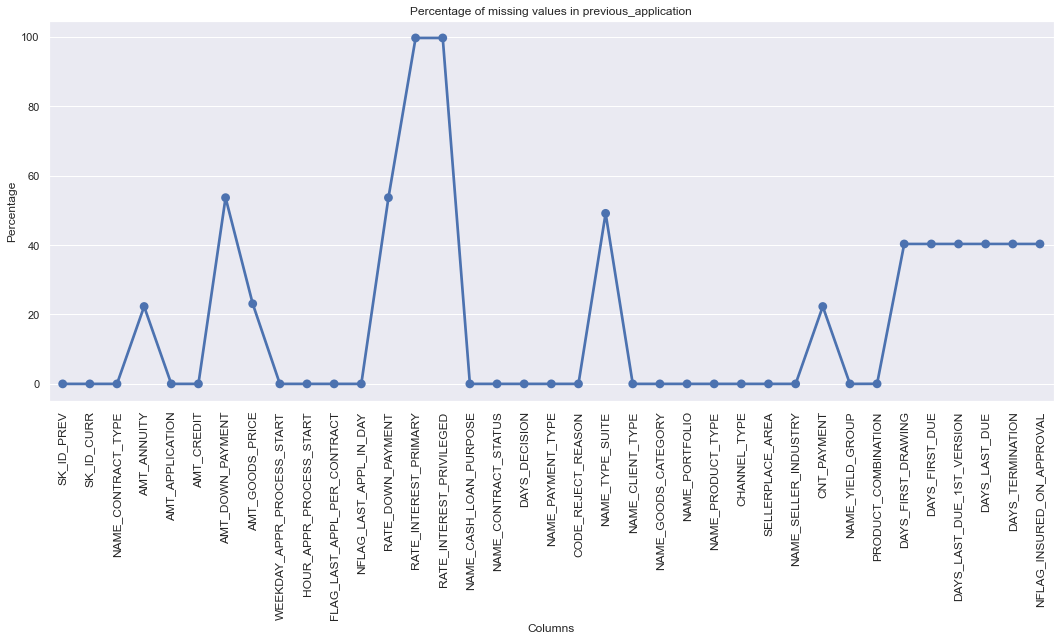

In [24]:
plt.figure(figsize=(18,7))
sns.set_theme(style='darkgrid')
ax = sns.pointplot(x='index',y=0,data=miss_previous_application)
plt.title('Percentage of missing values in previous_application')
plt.ylabel('Percentage')
plt.xticks(rotation = 90,fontsize=12)
plt.xlabel('Columns')

#### Inference - There are a lot of fields which holds missing values

### Removing columns with missing values more than 40%

In [25]:
# Removing the columns which have more than 40% of the missing or null values in Previous_application data set
previous_application = previous_application.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT',
                                                  'RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'
                                                 ,'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION'
                                                  ,'DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'
                                                 ,'NAME_TYPE_SUITE'],axis=1)

### Finding The missing value percentages using the Point Plot after removing the above columns

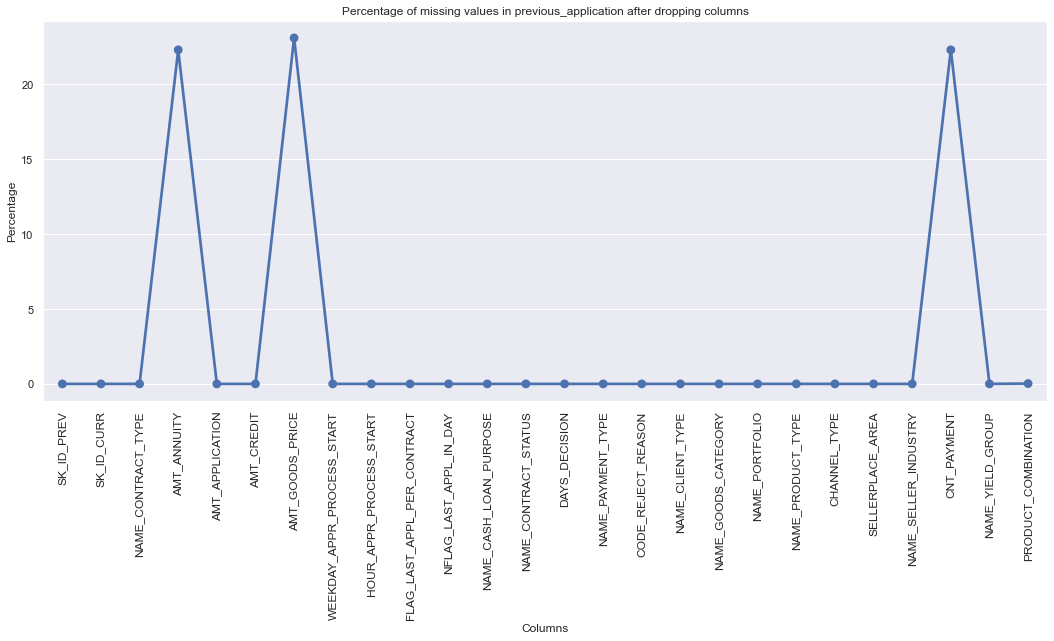

In [26]:
plt.figure(figsize=(18,7))
miss_previous_application = ((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
sns.set_theme(style='darkgrid')
ax = sns.pointplot(x='index',y=0,data=miss_previous_application)
plt.title('Percentage of missing values in previous_application after dropping columns')
plt.ylabel('Percentage')
plt.xticks(rotation = 90,fontsize=12)
plt.xlabel('Columns')
plt.show()

#### The above graph clearly shown that the missing values are clearly below 40% as some columns has been dropped

##### Now we can see that the previous_application data set contains less variables than before as we deleted the variables having high percentage of missing values

In [27]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [28]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


### Checking the missing value count after deleting the unrequired columns

In [29]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

#### There are 12 columns more which have some missing values, Lets get to each one of them individually.

## Finding the values that can be Imputed with the missing values

We have to impute the missing values by mean/median or mode values. We can conclude it by using the distplot or boxplot
If a variable is normally distributed, the mean, median, and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for numerical variables.
If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

In [30]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

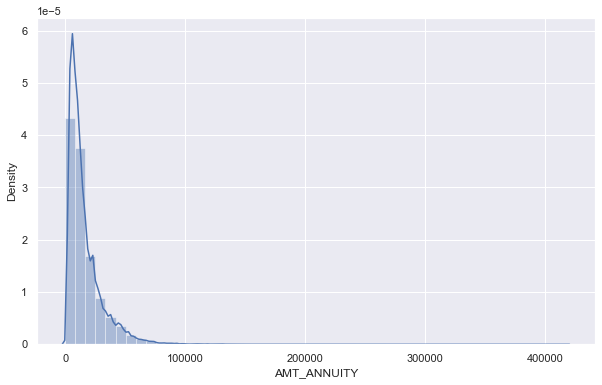

In [31]:
#Draw the plot here
plt.figure(figsize=(10,6))
sns.distplot(previous_application['AMT_ANNUITY'])
plt.show()

#### Inference - There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.

In [32]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

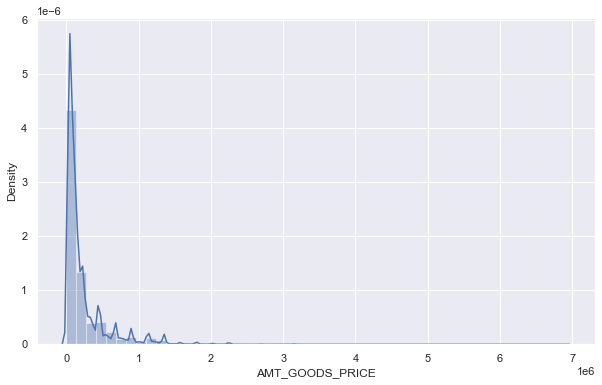

In [33]:
#Draw the plot here
plt.figure(figsize=(10,6))
sns.distplot(previous_application['AMT_GOODS_PRICE'])
plt.show()

There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.

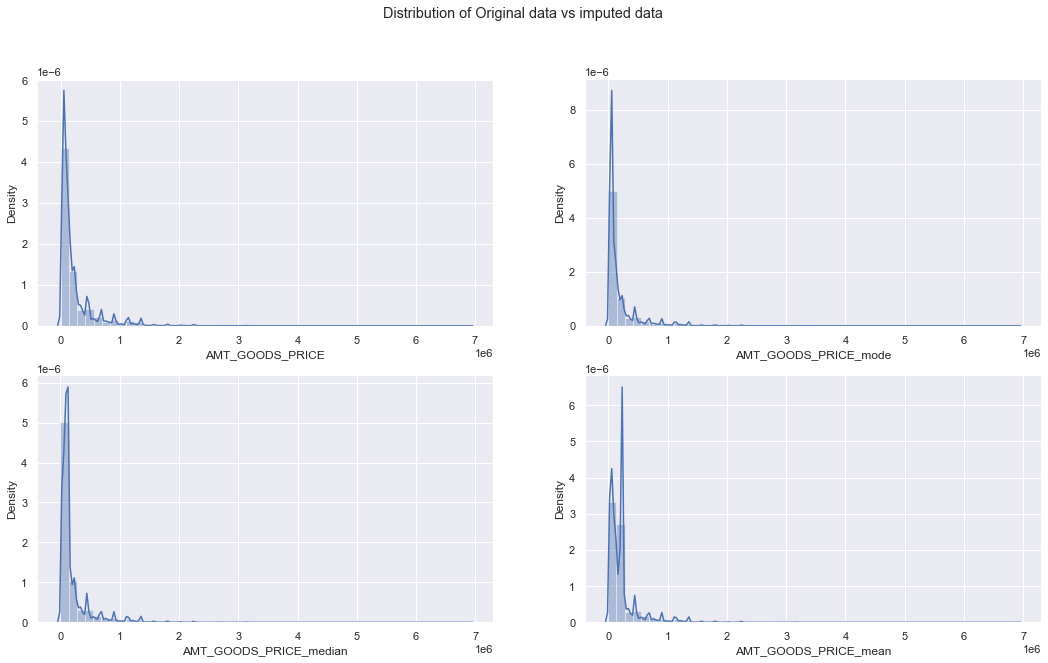

In [34]:
GoodspsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
GoodspsDF['AMT_GOODS_PRICE_mode'] = previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mode()[0])
GoodspsDF['AMT_GOODS_PRICE_median'] = previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].median())
GoodspsDF['AMT_GOODS_PRICE_mean'] = previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previous_application['AMT_GOODS_PRICE'][pd.notnull(previous_application['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(GoodspsDF[i[1]])

#### Inference - The original distribution is closer with the distribution of data imputed with mode in this case

In [35]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

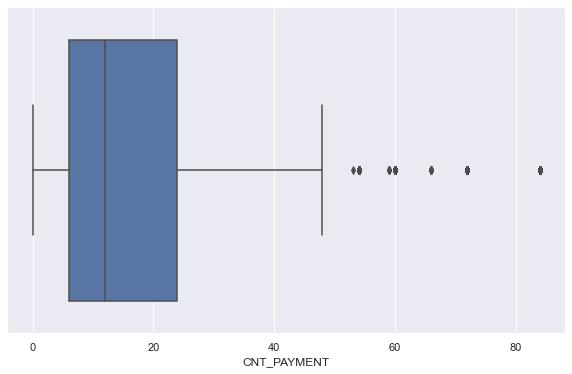

In [36]:
#Draw the plot here
plt.figure(figsize=(10,6))
sns.boxplot(previous_application['CNT_PAYMENT'])
plt.show()

#### Inference - We can fill NA values for "CNT_PAYMENT" with its median value of 12 as we can spot outliers

In [37]:
previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

#### As PRODUCT_COMBINATION is a categorial variable we prefer mode

#### Inference - Value can be filled with "Cash"

In [38]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

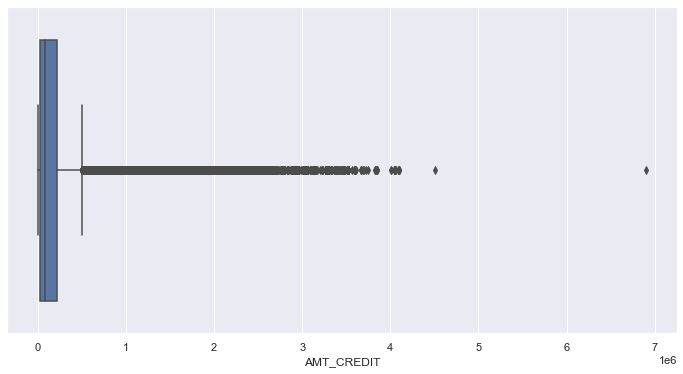

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(previous_application['AMT_CREDIT'])
plt.show()

#### Inference - We can fill NA values for "AMT_CREDIT" with its medain value, which is 80541
#### As we can see there are outliers in the plot we prefer median

# Application Data

In [40]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Finding the missing value percentages

In [41]:
miss_application_data = ((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data

,index,0
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT,0.000000
9,AMT_ANNUITY,0.003902


### Finding The missing value percentages using the Point Plot

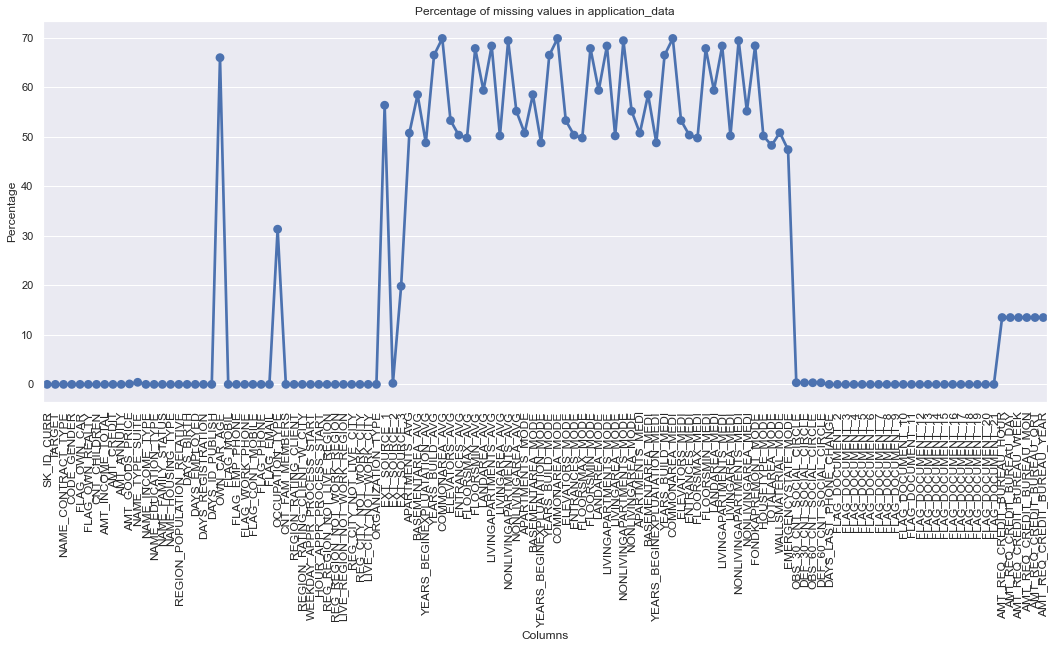

In [42]:
plt.figure(figsize=(18,7))
sns.set_theme(style='darkgrid')
ax = sns.pointplot(x='index',y=0,data=miss_application_data)
plt.title('Percentage of missing values in application_data')
plt.ylabel('Percentage')
plt.xticks(rotation = 90,fontsize=12)
plt.xlabel('Columns')
plt.show()

### Removing columns with missing values more than 40%

In [43]:
application_data = application_data.drop(['EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG'
                                          ,'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG'
                                          ,'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG'
                                          ,'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG'
                                          ,'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG'
                                          ,'NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE'
                                          ,'YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE'
                                          ,'LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI'
                                          ,'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI'
                                          ,'COMMONAREA_MEDI','ELEVATORS_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','ENTRANCES_MEDI'
                                          ,'LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI'
                                          ,'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE'
                                          ,'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OWN_CAR_AGE'],axis=1)

In [44]:
miss_application_data = ((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()

### After deleting the unrequired column the percentages through pointplot

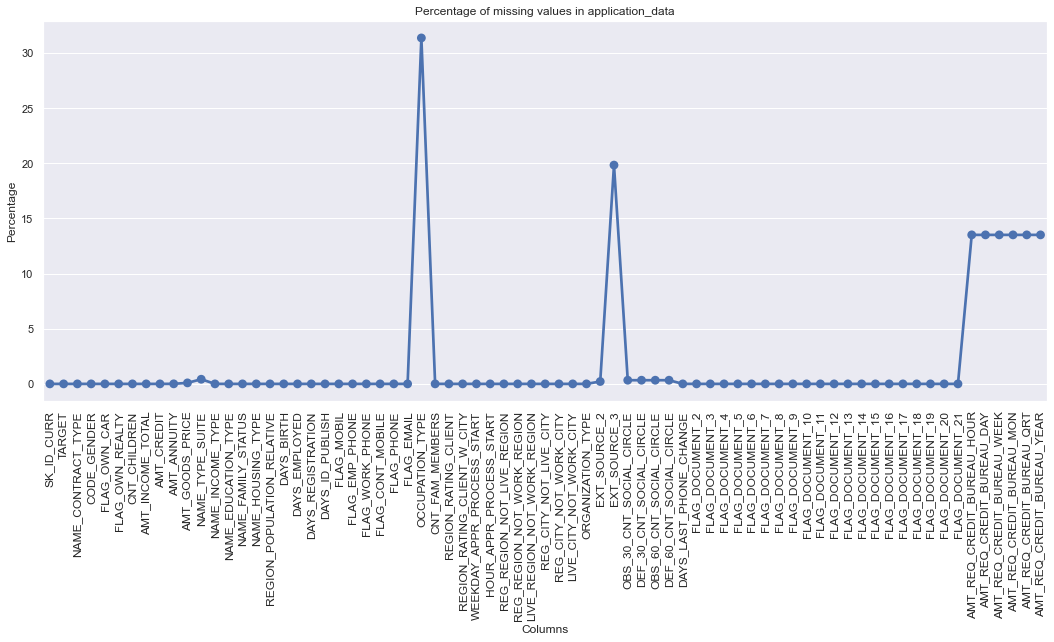

In [45]:
plt.figure(figsize=(18,7))
sns.set_theme(style='darkgrid')
ax = sns.pointplot(x='index',y=0,data=miss_application_data)
plt.title('Percentage of missing values in application_data')
plt.ylabel('Percentage')
plt.xticks(rotation = 90,fontsize=12)
plt.xlabel('Columns')
plt.show()

#### With the above command we have sucessfully dropped all the columns with missing values above 40% in application_data, data set
#### Now we want to check if the other columns with low missing value percentage can be imputed with some values

In [46]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### Inference - We can fill NA values for "NAME_TYPE_SUITE" with "Unaccompanied" so we go with the mode as it is a categorial variable

In [47]:
application_data['OCCUPATION_TYPE'].isnull().sum()

96391

#### Inference- Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category('Unknown') as assigning to any existing category might influence the analysis

#### Sucessfully imputed mode value 

In [48]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

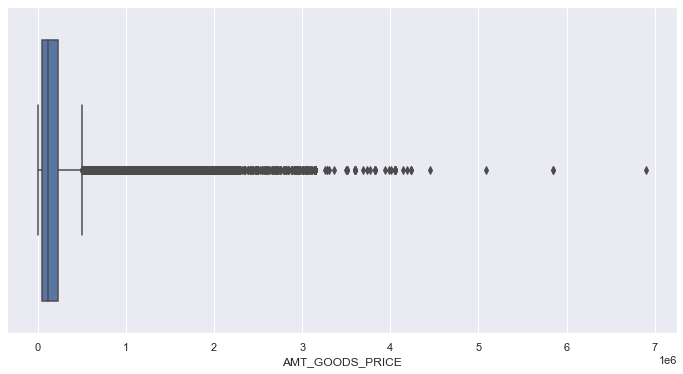

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(previous_application['AMT_GOODS_PRICE'])
plt.show()

#### Inference - We can fill NA values for "AMT_GOODS_PRICE" with its median value as we can spot outliers

In [50]:
application_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

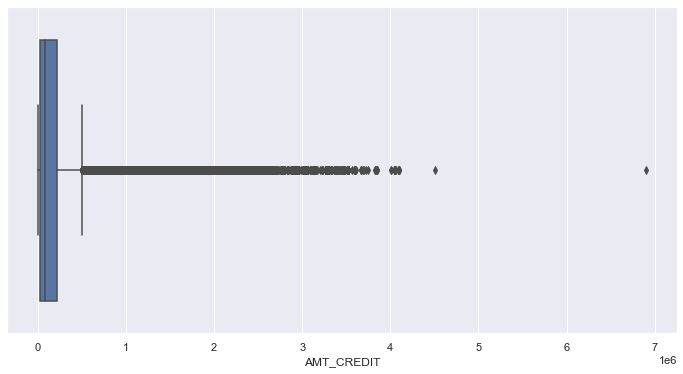

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(previous_application['AMT_CREDIT'])
plt.show()

#### Inference - We can fill NA values for "AMT_CREDIT" with its medain value as we can spot the outliers

In [52]:
application_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

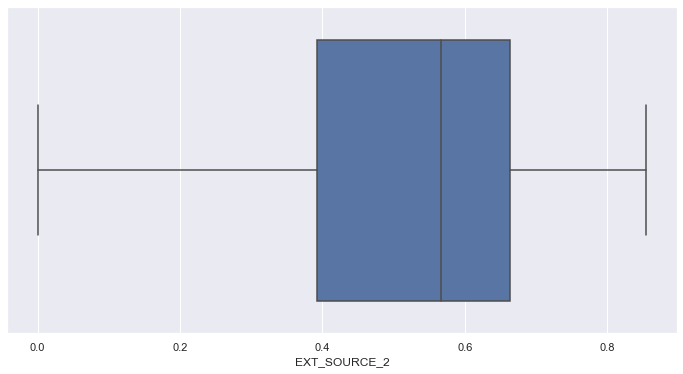

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['EXT_SOURCE_2'])
plt.show()

#### Inference - We can fill NA values for "EXT_SOURCE_2" with its mean value as we cannot see any outliers

In [54]:
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

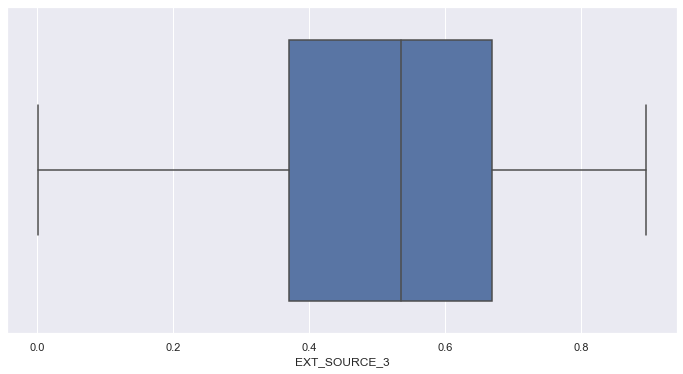

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['EXT_SOURCE_3'])
plt.show()

#### Inference - We can fill NA values for "EXT_SOURCE_3" with its mean value as we cannot see any outliers

In [56]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

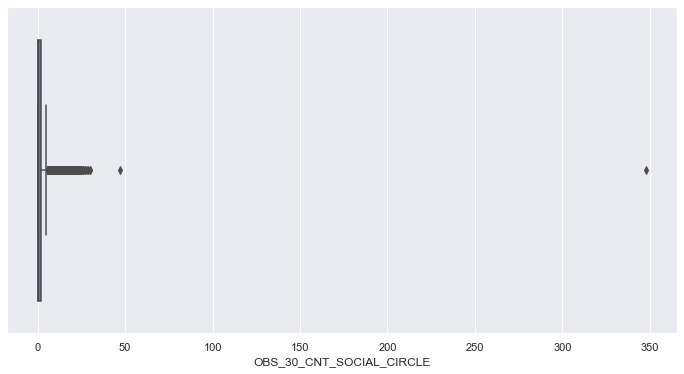

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

#### Inference - We can fill NA values for "OBS_30_CNT_SOCIAL_CIRCLE" with its medain value as we can spot the outliers

In [58]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

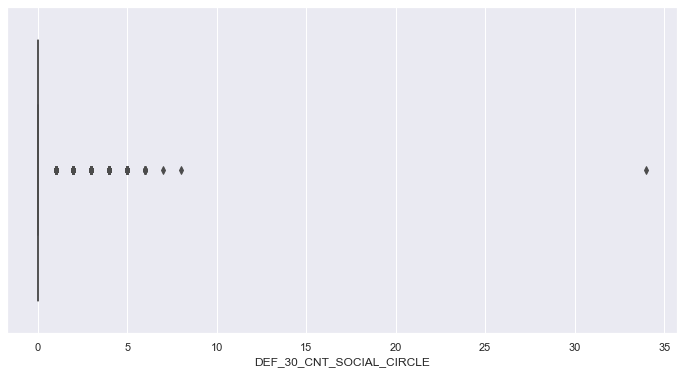

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

#### Inference - We can fill NA values for "DEF_30_CNT_SOCIAL_CIRCLE" with its medain value as we can spot the outliers

In [60]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

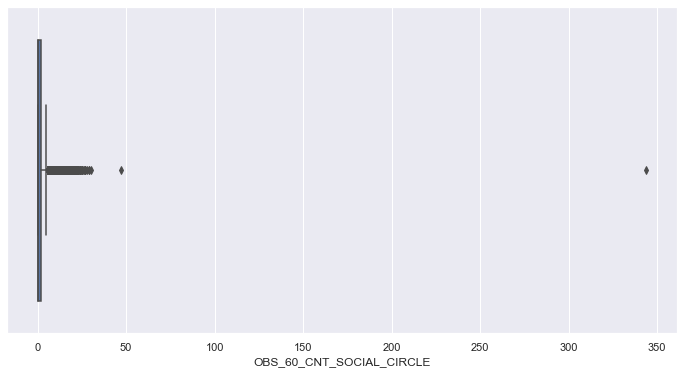

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

#### Inference - We can fill NA values for "OBS_60_CNT_SOCIAL_CIRCLE" with its medain value as we can spot the outliers

In [62]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

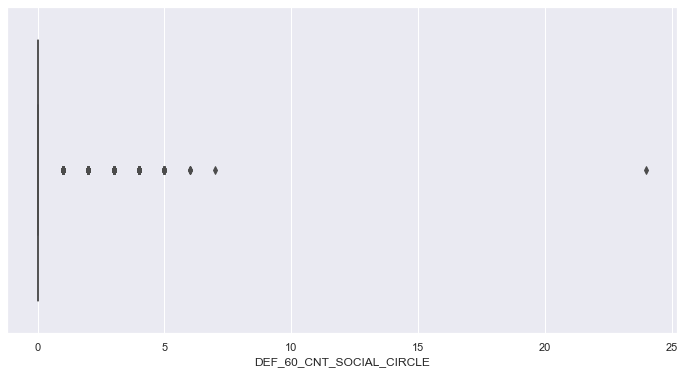

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

#### Inference - We can fill NA values for "DEF_60_CNT_SOCIAL_CIRCLE" with its medain value as we can spot the outliers

In [64]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

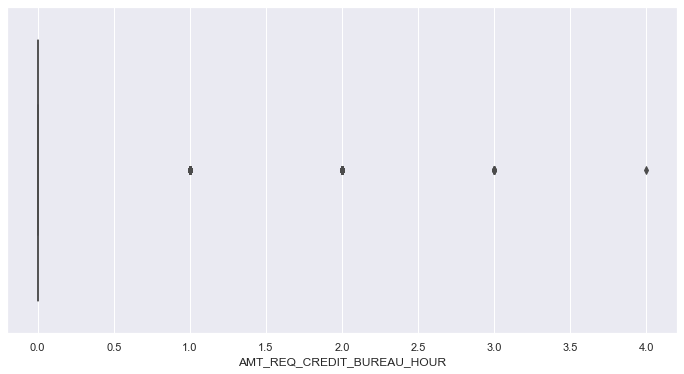

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.show()

#### Inference - We can fill NA values for "AMT_REQ_CREDIT_BUREAU_HOUR" with its medain value as we can spot the outliers

In [66]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

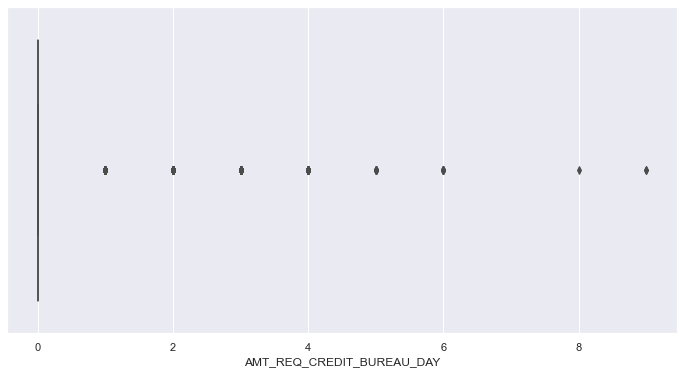

In [67]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

#### Inference - We can fill NA values for "AMT_REQ_CREDIT_BUREAU_DAY" with its medain value as we can spot the outliers

In [68]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

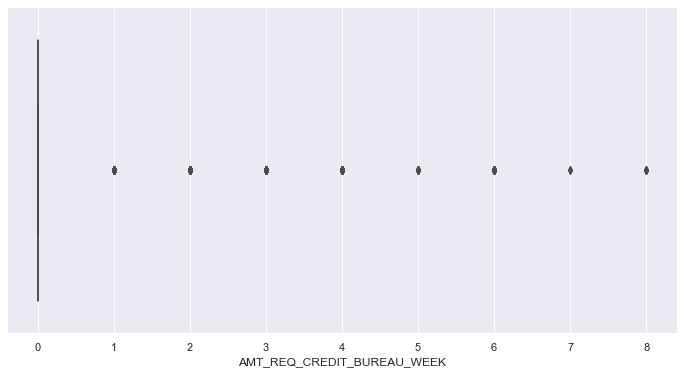

In [69]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.show()

#### Inference - We can fill NA values for "AMT_REQ_CREDIT_BUREAU_WEEK" with its medain value as we can spot the outliers

In [70]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

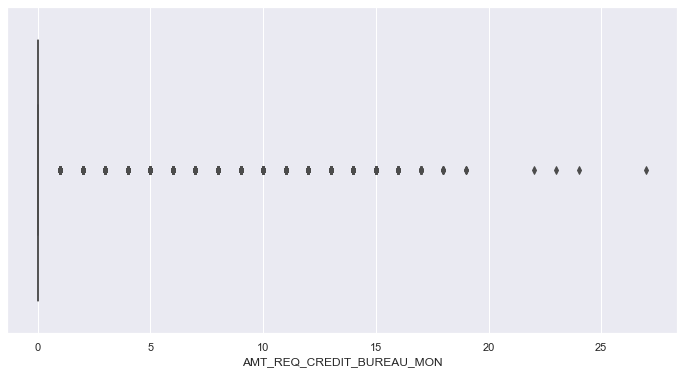

In [71]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

#### Inference - We can fill NA values for "AMT_REQ_CREDIT_BUREAU_MON" with its medain value as we can spot the outliers

In [72]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

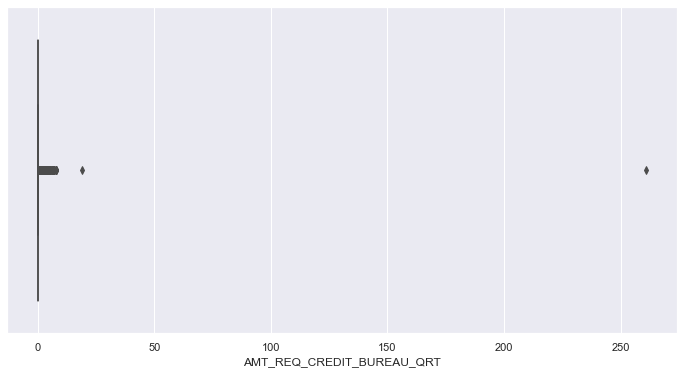

In [73]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

#### Inference - We can fill NA values for "AMT_REQ_CREDIT_BUREAU_QRT" with its medain value as we can spot the outliers

In [74]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

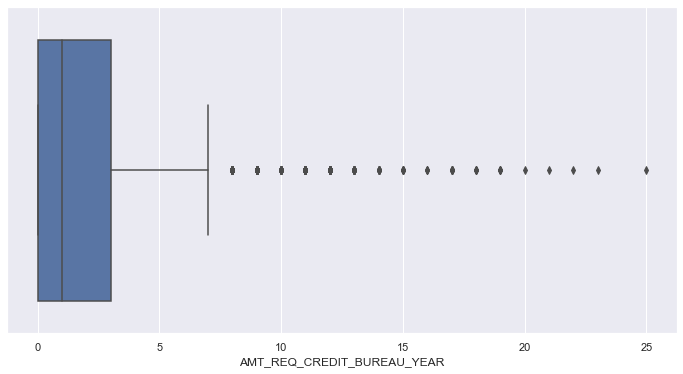

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

#### Inference - We can fill NA values for "AMT_REQ_CREDIT_BUREAU_YEAR" with its medain value as we can spot the outliers

### Data Standardization 

#### Data Standardization of application_data

In [76]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])
application_data['DAYS_EMPLOYED'] = abs(application_data['DAYS_EMPLOYED'])
application_data['DAYS_REGISTRATION'] = abs(application_data['DAYS_REGISTRATION'])

In [77]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Conversion of Object and Object columns to Categorical Columns

In [79]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for i in categorical_columns:
    application_data[i] =pd.Categorical(application_data[i])

In [80]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### Binning Numerical Columns to create a categorical column

#### Creating bin for AMT_INCOME_TOTAL

In [81]:
application_data['AMT_INCOME_TOTAL']=application_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k',
        '400k-500k','500k-600k','600k-700k','700k-800k',
        '800k-900k','900k-1M', '1M Above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)


In [82]:
application_data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

#### Inference: More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

#### Creating bins for AMT_CREDIT

In [83]:

application_data['AMT_CREDIT']=application_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k',
         '500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

In [84]:
application_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

#### Inference - More Than 16% loan applicants have taken loan which amounts to more than 1M.

#### Creating bins for Age

In [85]:
application_data['AGE'] = application_data['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

application_data['AGE_GROUP']=pd.cut(application_data['AGE'],bins=bins,labels=slots)

In [86]:
application_data['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

#### Inference : 31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

#### Creating bins for YEARS_EMPLOYED

In [87]:

application_data['YEARS_EMPLOYED'] = application_data['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

application_data['EMPLOYMENT_YEAR']=pd.cut(application_data['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [88]:
application_data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
60 above     0.000000
50-60        0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

#### Inference : More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience

### Standardizing data for previous_application

#### Converting the negative values to absolute values

In [89]:
previous_application['DAYS_DECISION'] = abs(previous_application['DAYS_DECISION'])

In [90]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


#### Age group calculation

In [91]:
previous_application['DAYS_DECISION_GROUP'] = (previous_application['DAYS_DECISION']-(previous_application['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((previous_application['DAYS_DECISION'] - (previous_application['DAYS_DECISION'] % 400)) + (previous_application['DAYS_DECISION'] % 400) + (400 - (previous_application['DAYS_DECISION'] % 400))).astype(str)

In [92]:
previous_application['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

#### Insight : Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision

In [93]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

#### Converting object data type to categorial

In [94]:
previous_application_cat = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for i in previous_application_cat :
    previous_application[i] = pd.Categorical(previous_application[i])


In [95]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1297979 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1284699 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object  
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 12  NAME_CONTRACT_STATUS        

### Implementing Data Imputation 

In [96]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

#### application_data imputation

In [97]:
application_data['NAME_TYPE_SUITE'].fillna((application_data['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

In [98]:
application_data['NAME_TYPE_SUITE'].isnull().sum()

0

In [99]:
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].cat.add_categories('Unknown')
application_data['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

In [100]:
application_data['OCCUPATION_TYPE'].isnull().sum()

0

In [101]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for i in amount:
    application_data[i].fillna(application_data[i].median(),inplace = True)

#### previous_application imputation

In [102]:
previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].median(),inplace = True)

In [103]:
previous_application['AMT_ANNUITY'].isnull().sum()

0

In [104]:
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [105]:
previous_application['AMT_GOODS_PRICE'].isnull().sum()

0

In [106]:
previous_application['CNT_PAYMENT'].fillna(0,inplace = True)

In [107]:
previous_application['CNT_PAYMENT'].isnull().sum()

0

In [108]:
round(previous_application.isnull().sum() / previous_application.shape[0] * 100.00,2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                    0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE                0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                    0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
DAYS_DECISION_GROUP            0.00
dtype: float64

### Identifying the application_data outliers

In [109]:
application_data_out1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_GOODS_PRICE','DAYS_EMPLOYED']
application_data_out2 = ['CNT_CHILDREN','DAYS_BIRTH']

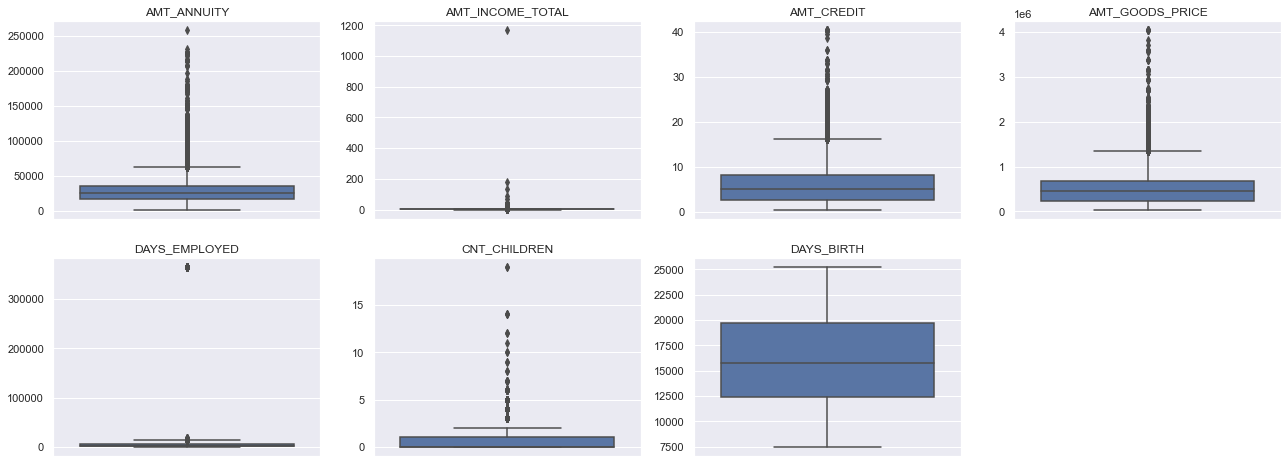

In [110]:
plt.figure(figsize=(22,8))

for i in enumerate(application_data_out1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")
for i in enumerate(application_data_out2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=application_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")    

Inference:
It can be seen that in current application data

AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
DAYS_BIRTH has no outliers which means the data available is reliable.
DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

In [111]:
application_data[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


### Identifying the previous_application outliers

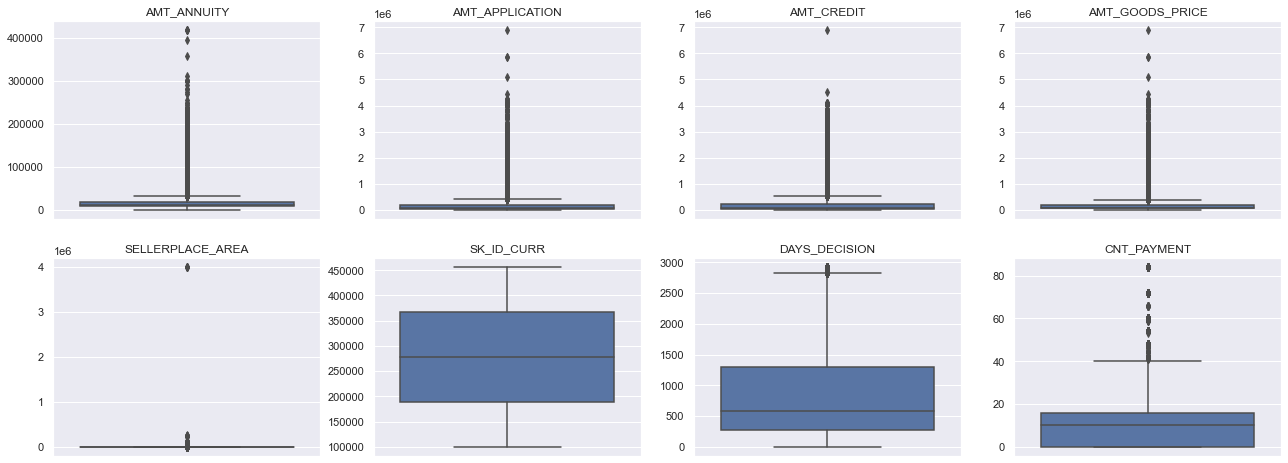

In [112]:
plt.figure(figsize=(22,8))

previous_application_out1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
previous_application_out2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(previous_application_out1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previous_application[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(previous_application_out2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previous_application[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

Inference:It can be seen that in previous application data
    
AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
CNT_PAYMENT has few outlier values.
SK_ID_CURR is an ID column and hence no outliers.
DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

In [113]:
previous_application[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


# Data Analysis

#### Distribution of the target variable

In [114]:
loanee = application_data['TARGET'].value_counts().reset_index()
loanee

,index,TARGET
0,0,282686
1,1,24825


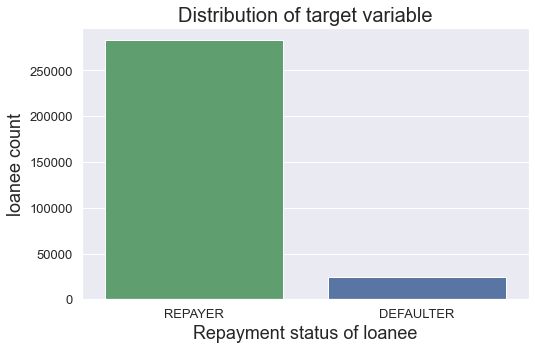

In [115]:
plt.figure(figsize=(8,5))
x = ['REPAYER','DEFAULTER']
sns.barplot(x,'TARGET',data=loanee,palette=['g','b'])
plt.xlabel('Repayment status of loanee',fontsize = 18)
plt.ylabel('loanee count',fontsize =18)
plt.title('Distribution of target variable',fontsize = 20)
plt.tick_params(labelsize=13)
plt.show()

#### Finding the data imbalance on CODE_GENDER

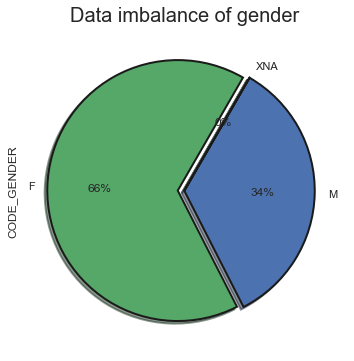

In [116]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
application_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["g","b"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Data imbalance of gender",fontsize=20)
plt.show()

### function for plotting repetitive countplots in univariate categorical analysis on applicationDF

This function will create two subplots: 
1. Count plot of categorical column w.r.t TARGET; 
2. Percentage of defaulters within column

In [117]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = application_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=application_data,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

#### Checking the contract type based on loan repayment status

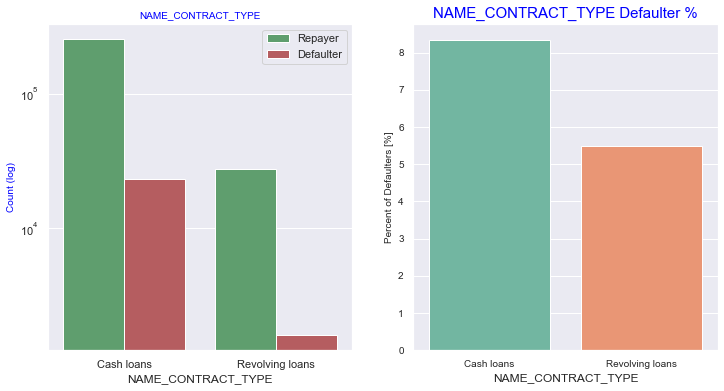

In [118]:
univariate_categorical('NAME_CONTRACT_TYPE',True)

#### Checking the type of Gender on loan repayment status

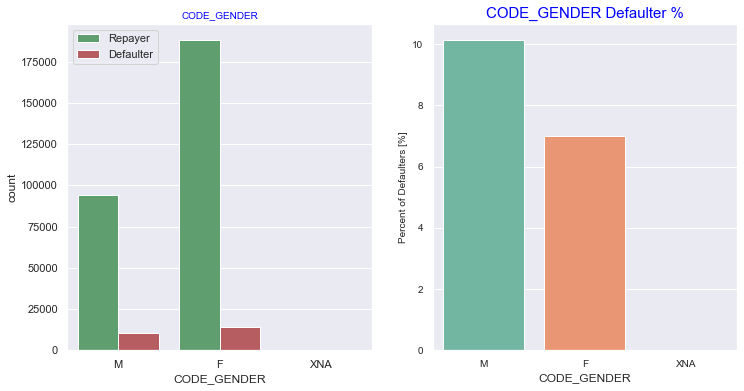

In [119]:
univariate_categorical('CODE_GENDER')

#### Checking if owning a car is related to loan repayment status

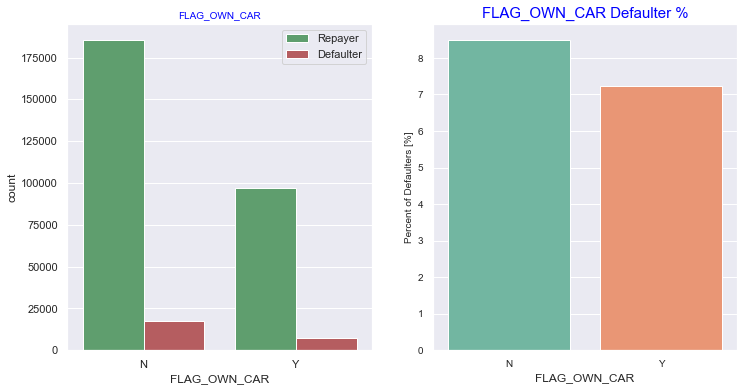

In [120]:
univariate_categorical('FLAG_OWN_CAR')

#### Checking if owning a realty is related to loan repayment status

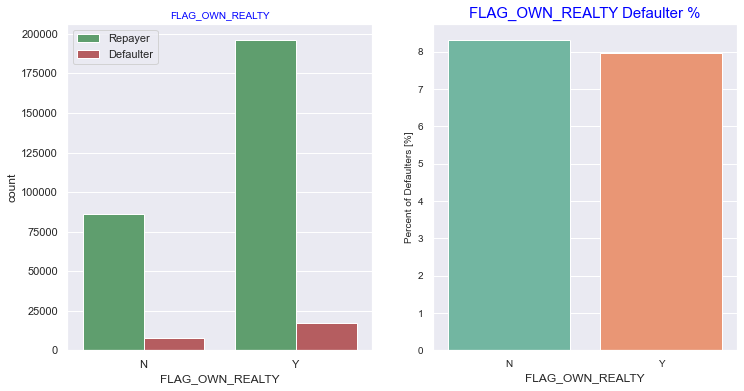

In [121]:
univariate_categorical('FLAG_OWN_REALTY')

#### Analyzing Housing Type based on loan repayment status

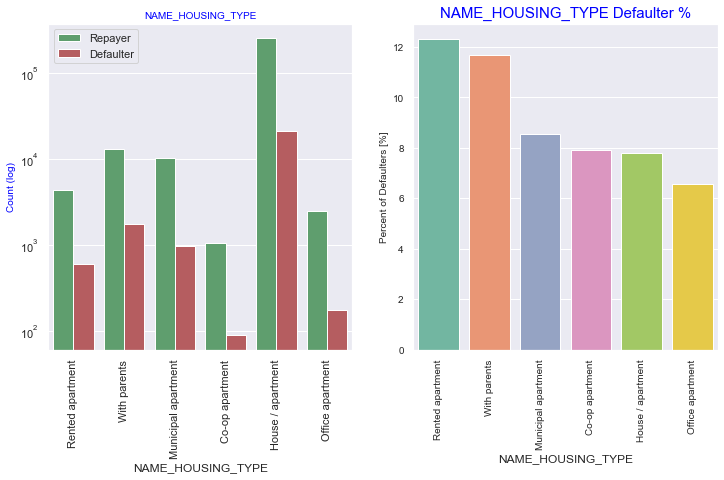

In [122]:
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

#### Analyzing Family status based on loan repayment status

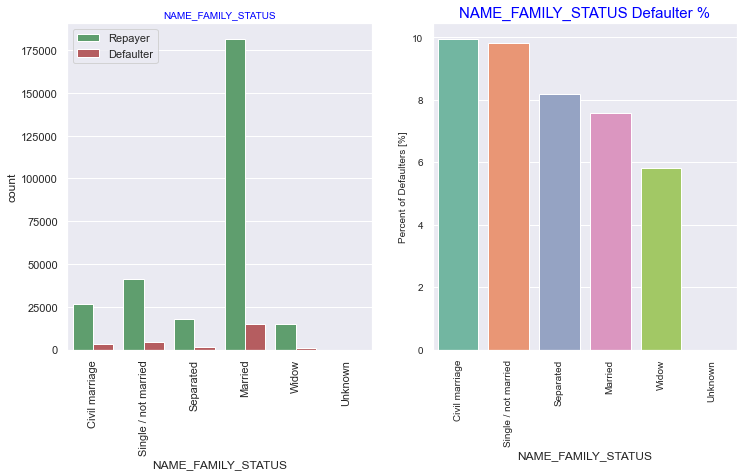

In [123]:
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

#### Analyzing Education Type based on loan repayment status

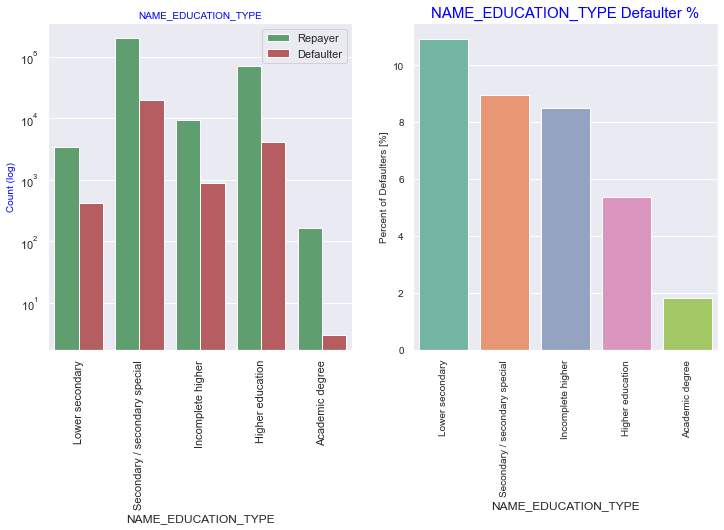

In [124]:
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

#### Analyzing Income Type based on loan repayment status

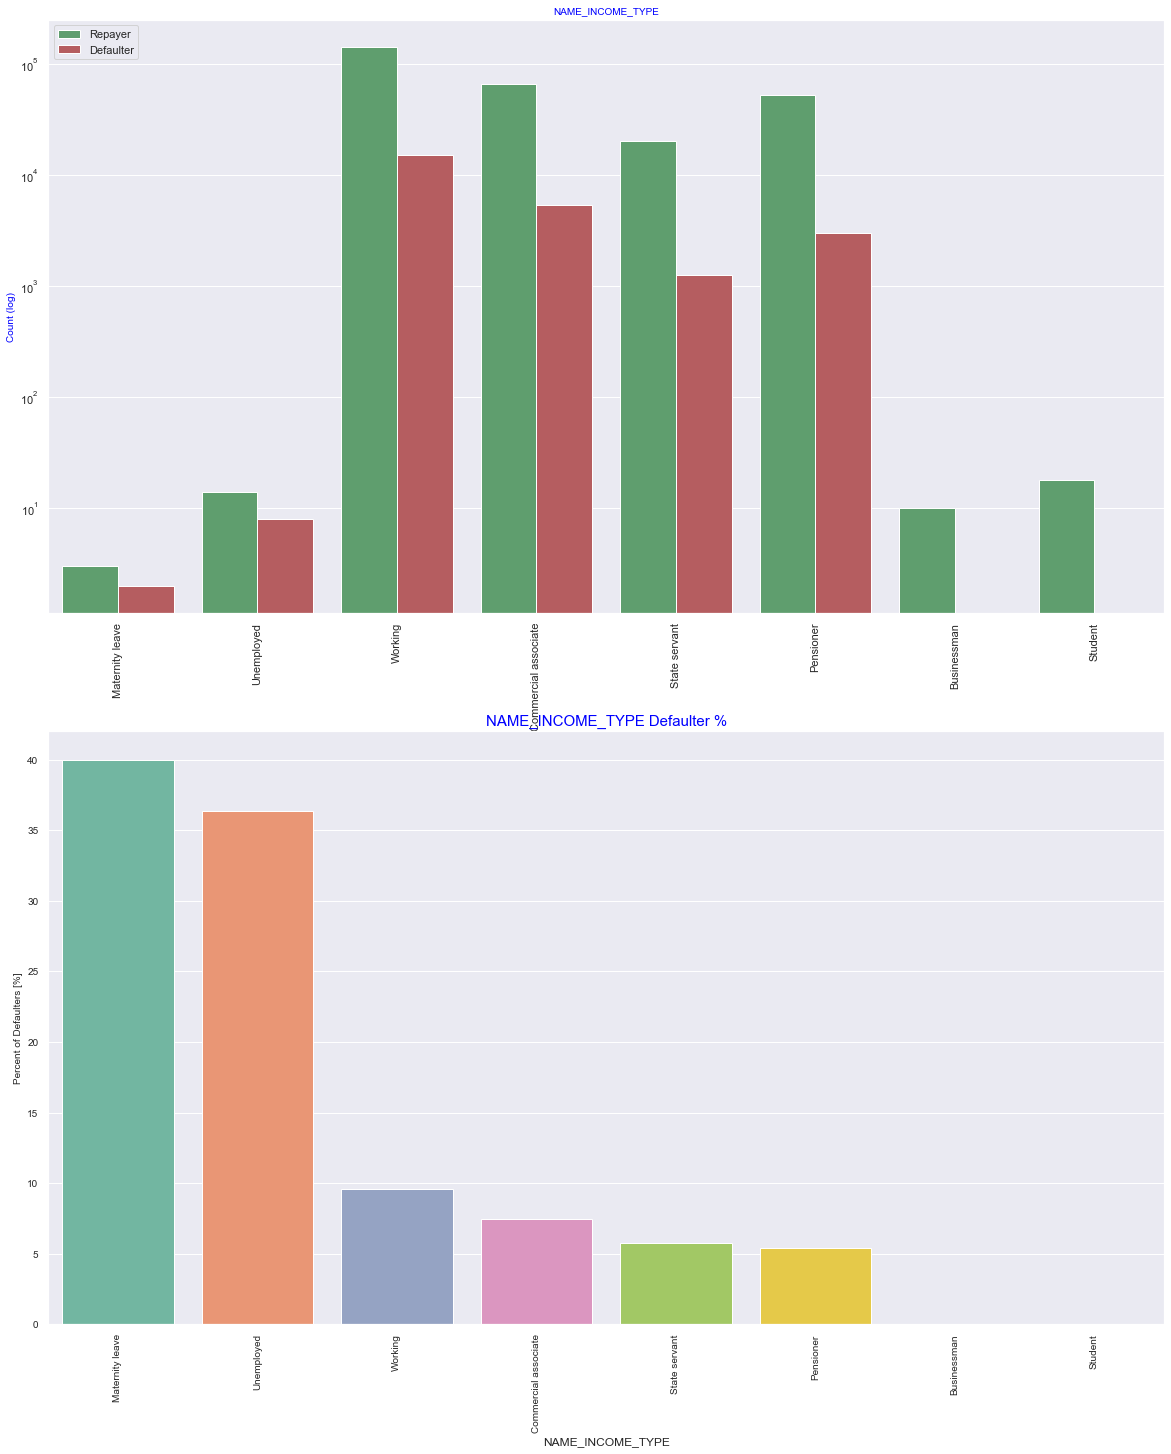

In [125]:
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

#### Analyzing Region rating where applicant lives based on loan repayment status

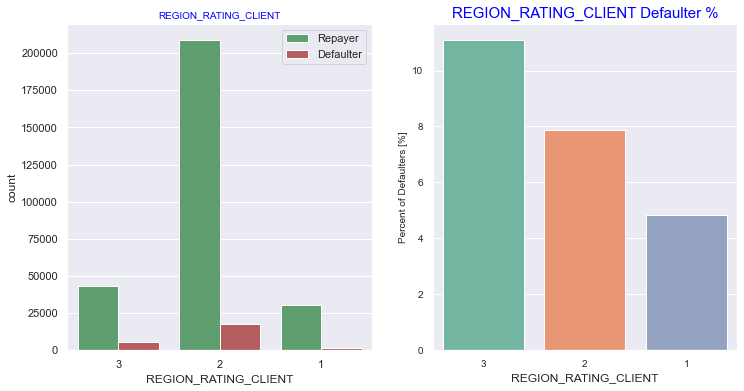

In [126]:
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

#### Analyzing Occupation Type where applicant lives based on loan repayment status

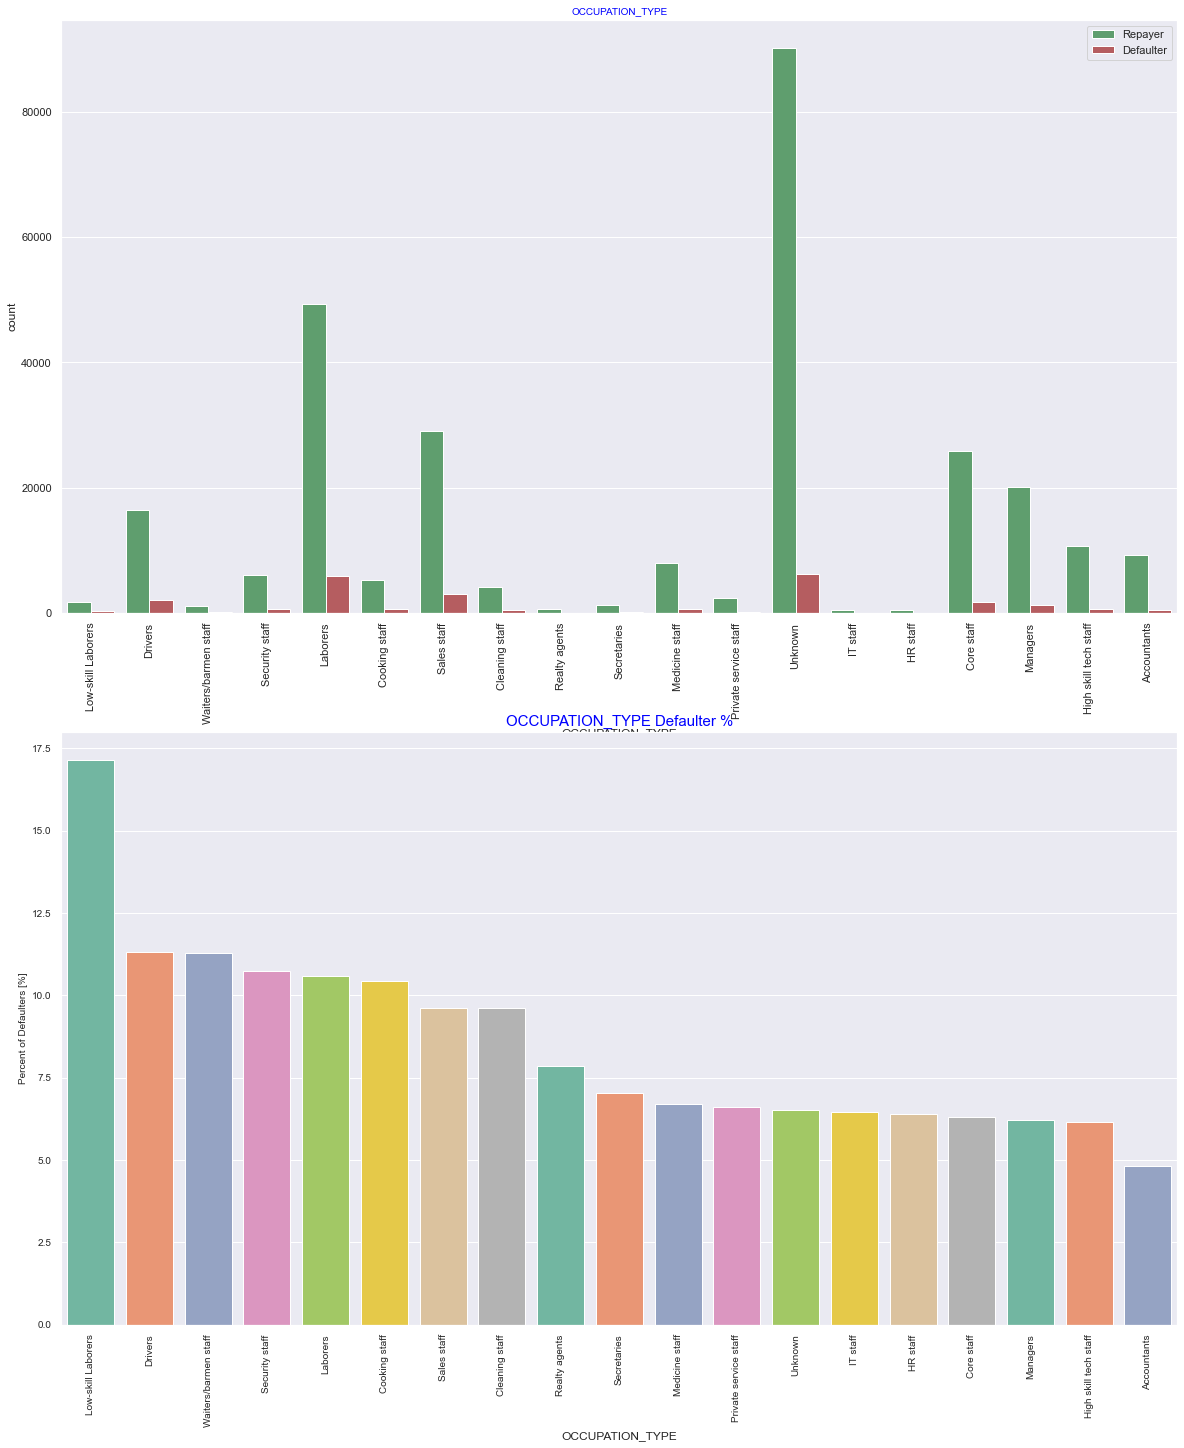

In [127]:
univariate_categorical("OCCUPATION_TYPE",False,True,False)

#### Checking Loan repayment status based on Organization type

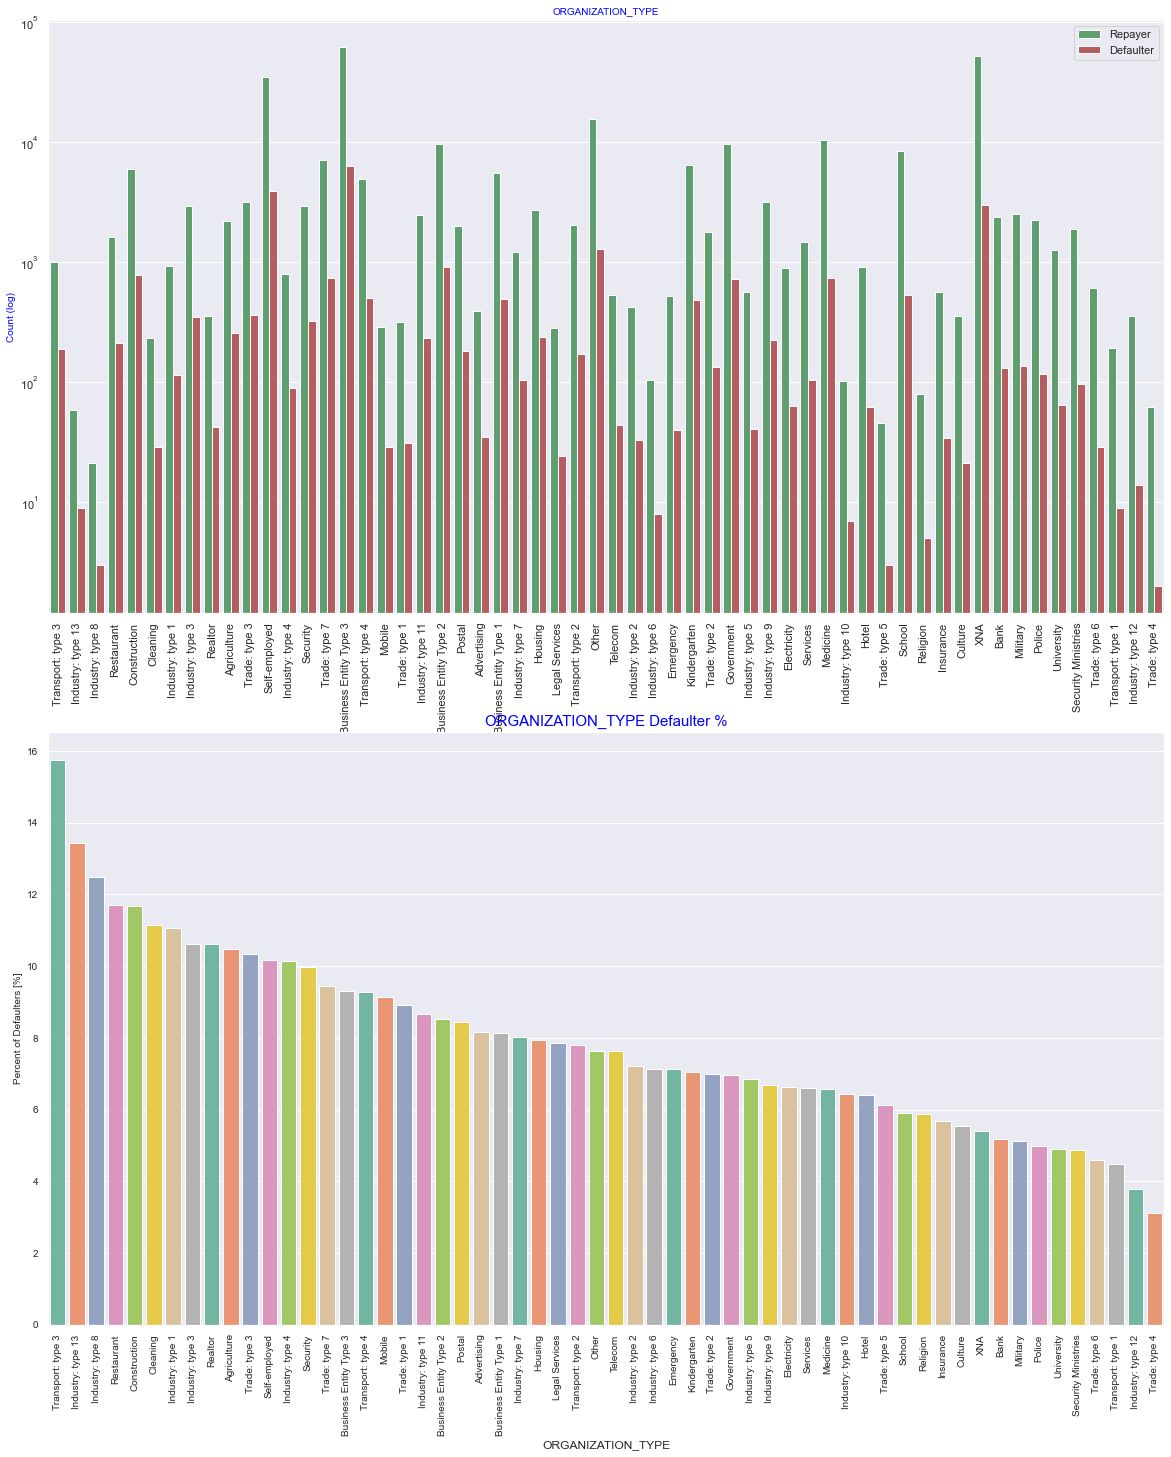

In [128]:
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

#### Analyzing Flag_Doc_3 submission status based on loan repayment status

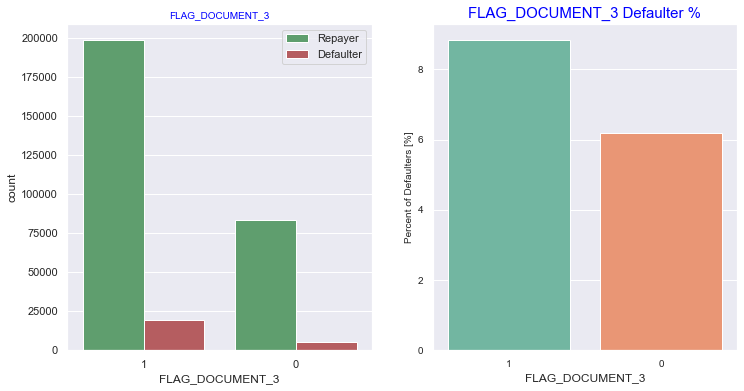

In [129]:
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

#### Analyzing Age Group based on loan repayment status

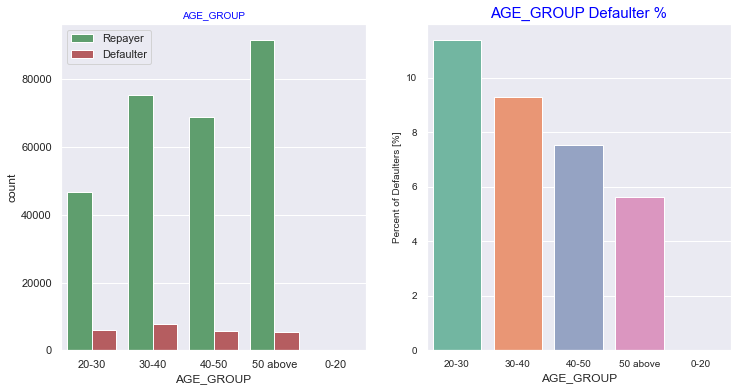

In [130]:
univariate_categorical("AGE_GROUP",False,False,True)

#### Analyzing Employment_Year based on loan repayment status

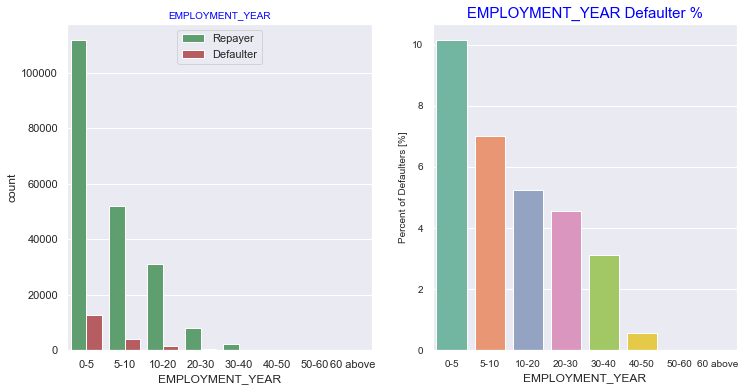

In [131]:
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

#### Analyzing Amount_Credit based on loan repayment status

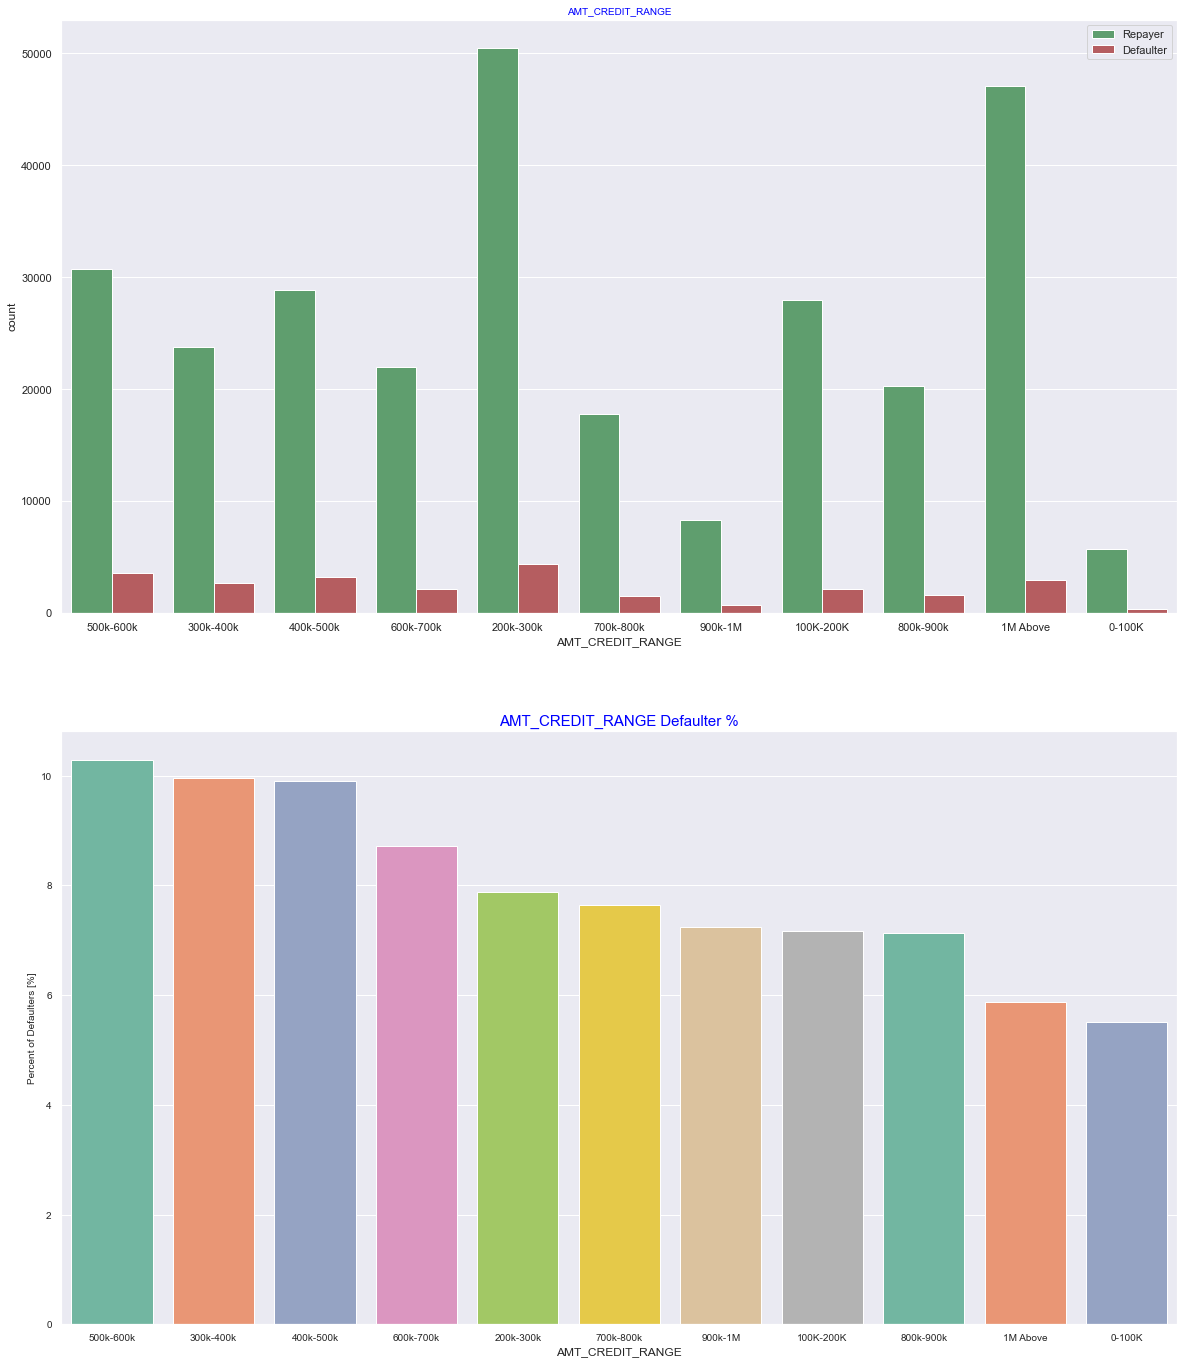

In [132]:
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

#### Analyzing Amount_Income Range based on loan repayment status

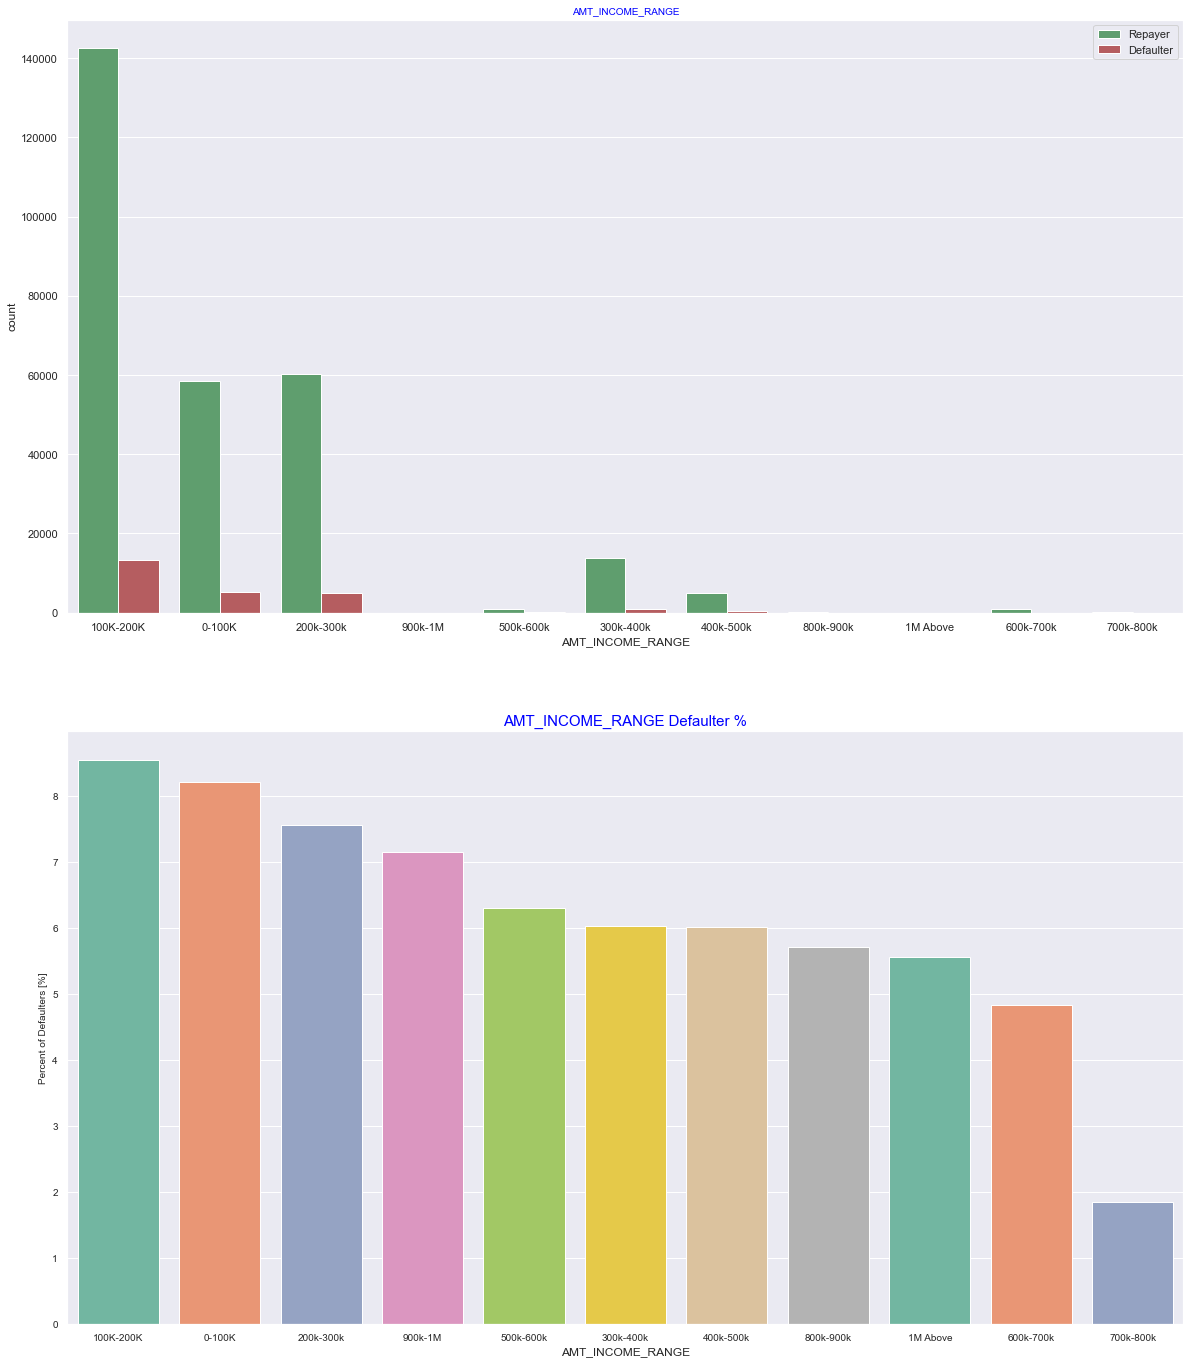

In [133]:
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

#### Analyzing Number of children based on loan repayment status

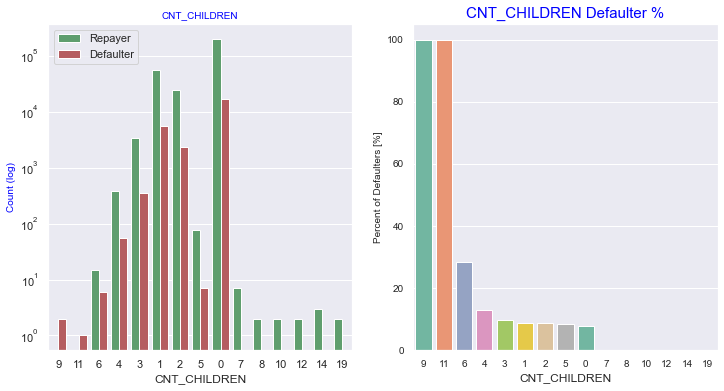

In [134]:
univariate_categorical("CNT_CHILDREN",True)

#### Analyzing Number of family members based on loan repayment status

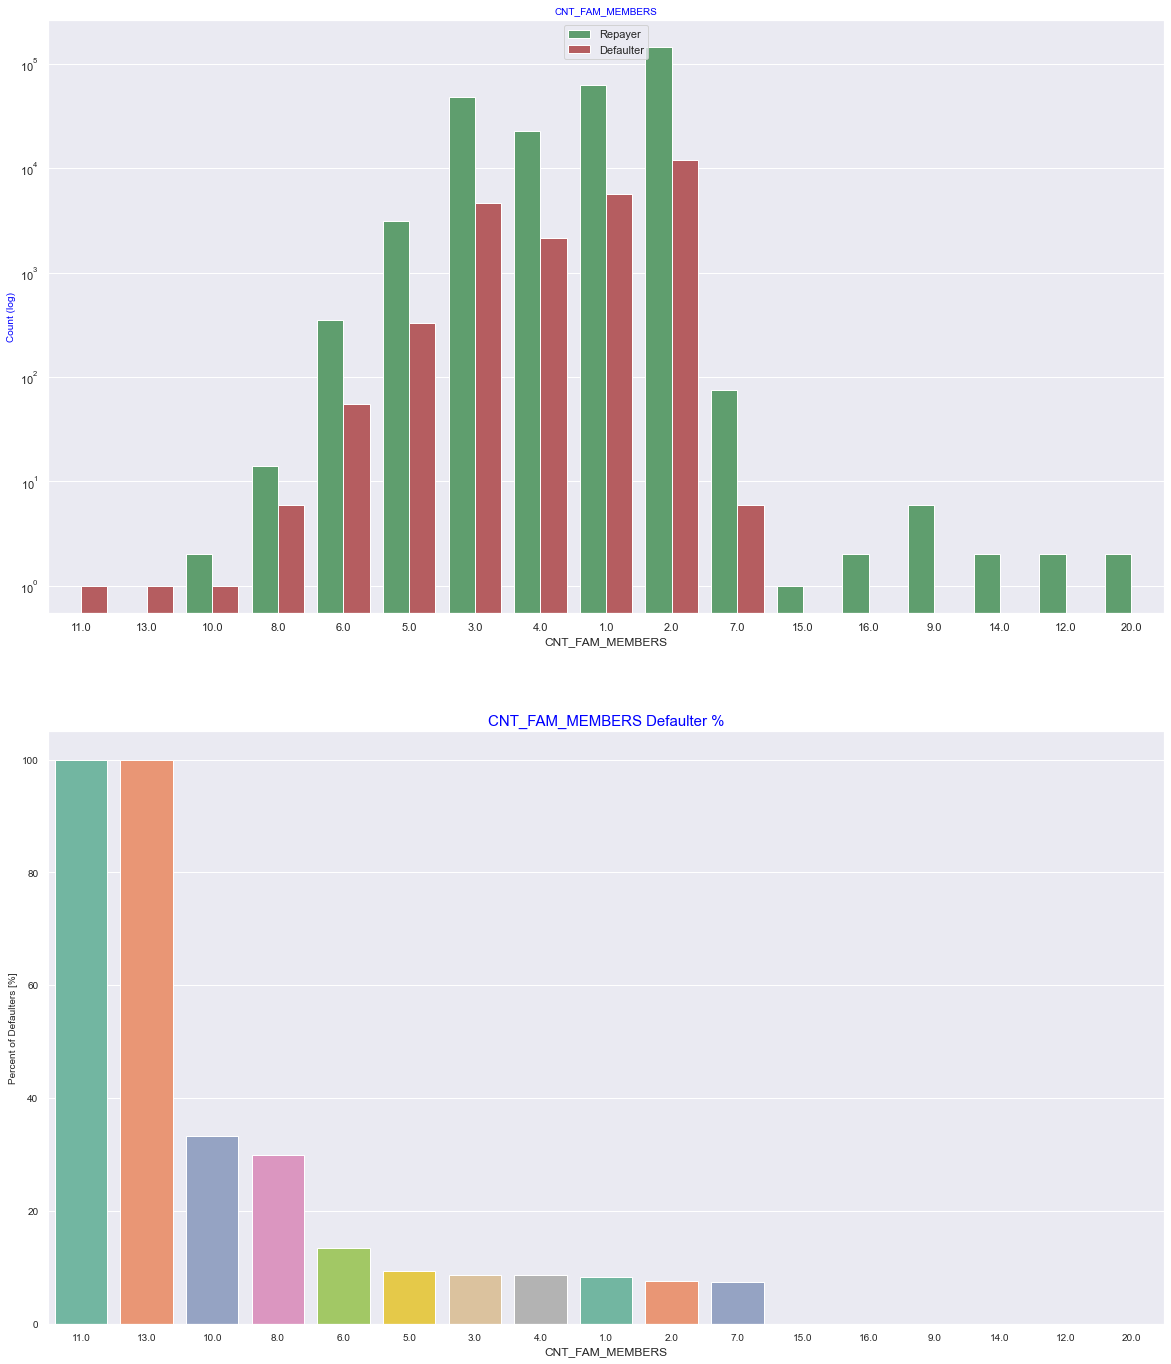

In [135]:
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

### Categorical Bivariate Analysis

In [136]:
application_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


### function for plotting repetitive countplots in bivariate categorical analysis

In [137]:
def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(i, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

### function for plotting repetitive relation plots in bivaritae numerical analysis on applicationDF

In [138]:
def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=application_data, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

#### Income type vs Income Amount Range

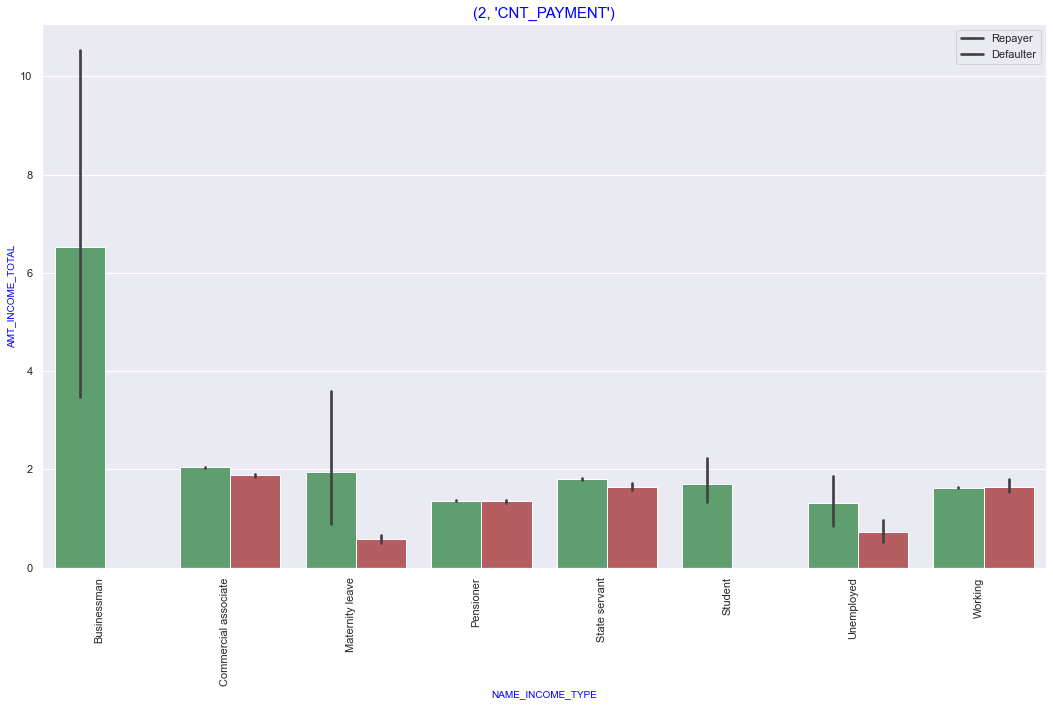

In [139]:
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",application_data,"TARGET",(18,10))

### Numeric Variables Analysis

#### Bifurcating the application_data dataframe based on Target value 0 and 1 for correlation and other analysis

In [140]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [141]:
Repayer_df = application_data.loc[application_data['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = application_data.loc[application_data['TARGET']==1, cols_for_correlation] # Defaulters

### Correlation between numeric variable

#### Getting the top 10 correlation for the Repayers data

In [142]:
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


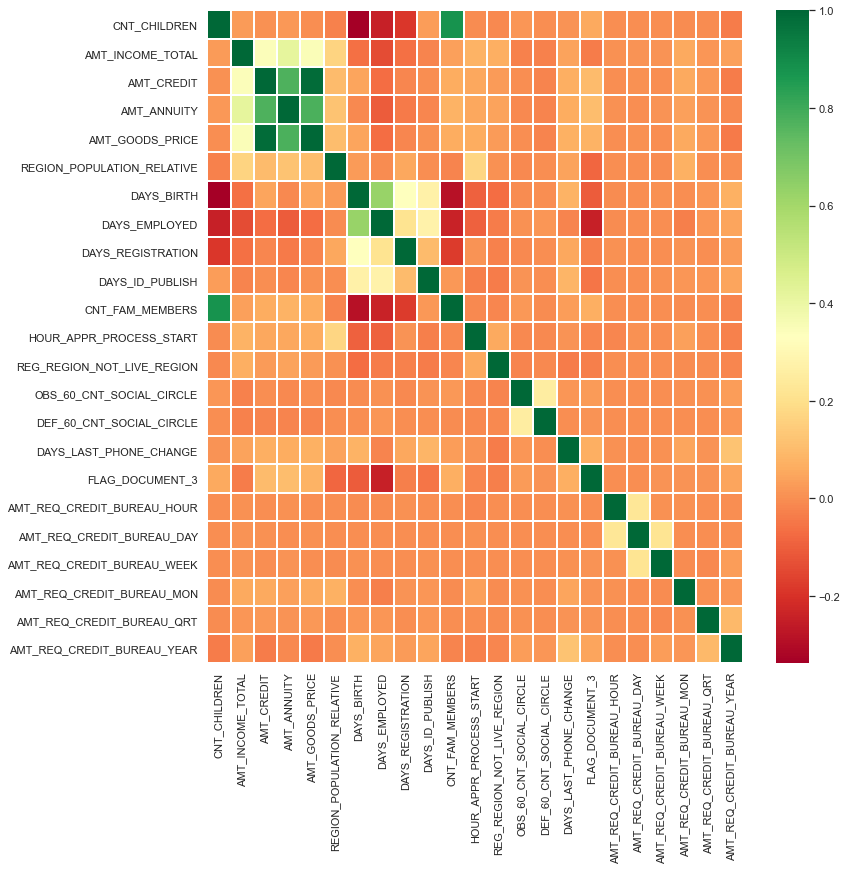

In [143]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

#### Getting the top 10 correlation for the Repayers data

In [144]:
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


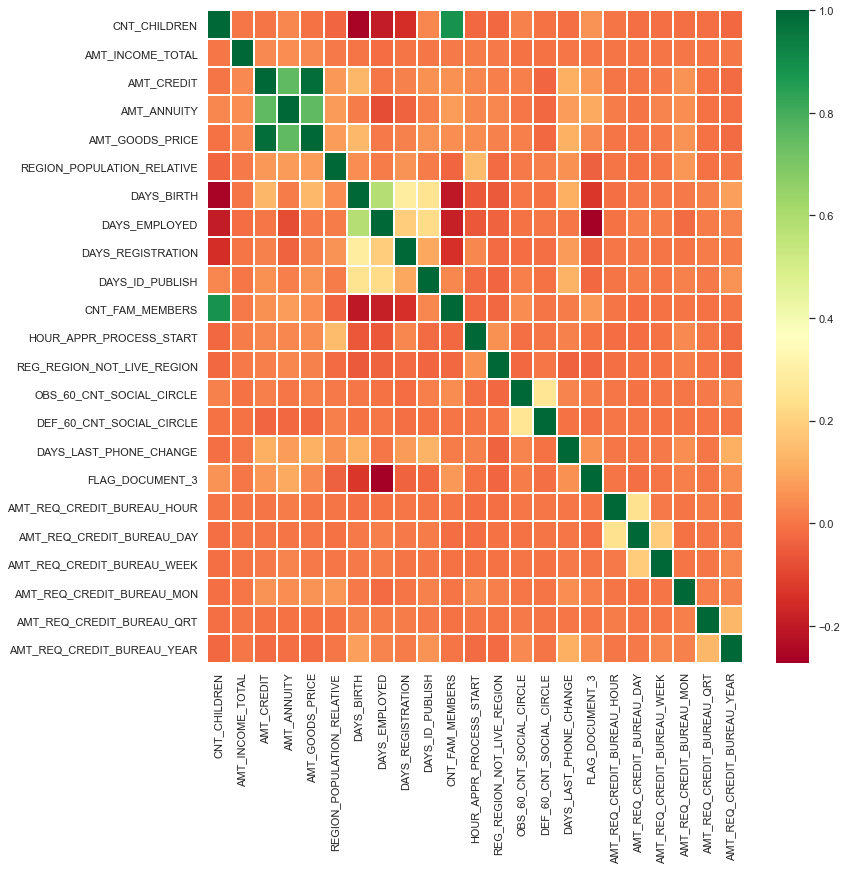

In [145]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

### Numerical Univariate Analysis

#### Plotting the numerical columns related to amount as distribution plot to see density

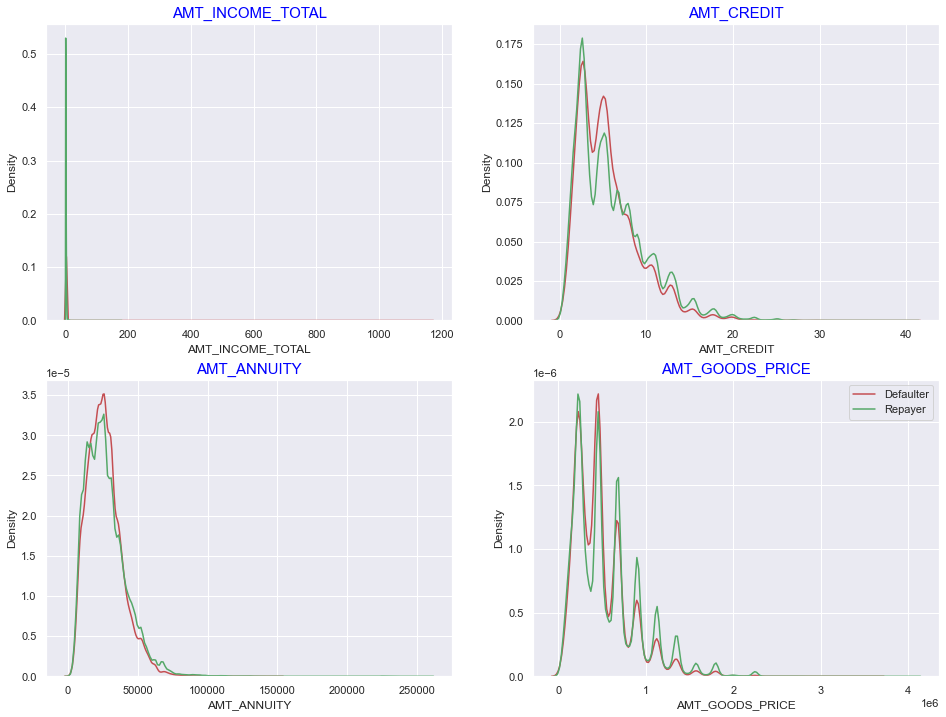

In [146]:
amount = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

### Numerical Bivariate Analysis

#### Checking the relationship between Goods price and credit and comparing with loan repayment status

<Figure size 1080x432 with 0 Axes>

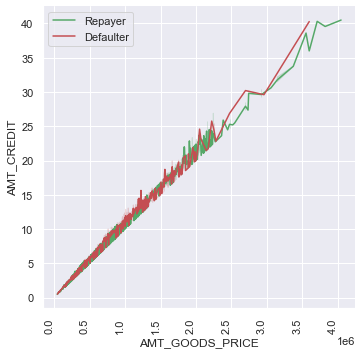

In [147]:
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',application_data,"TARGET", "line", ['g','r'], False,(15,6))

#### Plotting pairplot between amount variable to draw reference against loan repayment status

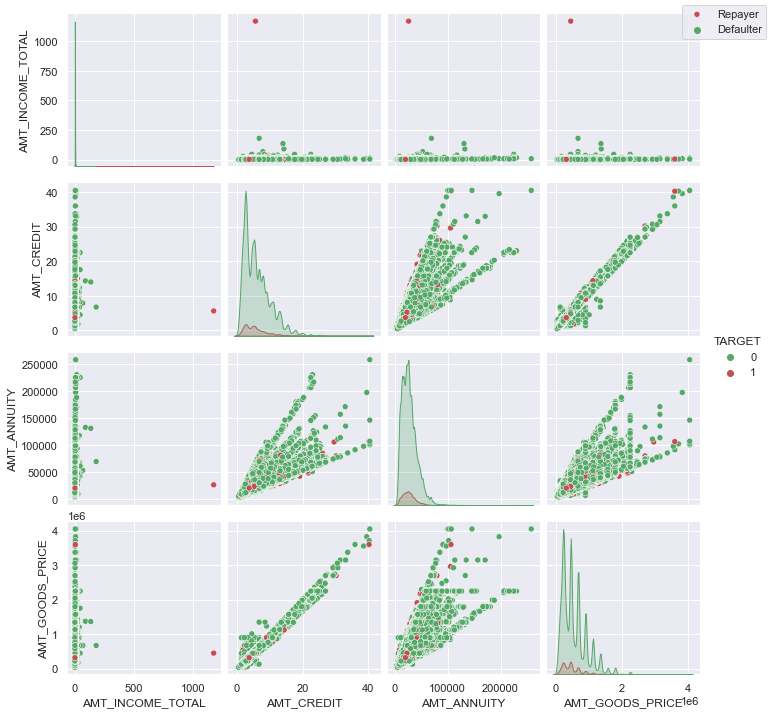

In [148]:
amount = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

### function for plotting repetitive countplots in univariate categorical analysis on the merged df

In [149]:
def univariate_merged(i,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=i, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[i].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(i , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

### Function to plot point plots on merged dataframe

In [150]:
def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=merged_loan_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

#### merge both the dataframe on SK_ID_CURR with Inner Joins

In [151]:
merged_loan_df = pd.merge(application_data, previous_application, how='inner', on='SK_ID_CURR')
merged_loan_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k,400k-500k,25,20-30,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2396755,Consumer loans

#### Checking the details of the merged dataframe

In [152]:
merged_loan_df.shape

(1413701, 105)

#### Checking the details of the merged dataframe

In [153]:
merged_loan_df.size

148438605

#### Checking the details of the merged dataframe

In [154]:
merged_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 105 entries, SK_ID_CURR to DAYS_DECISION_GROUP
dtypes: category(37), float64(25), int64(41), object(2)
memory usage: 794.1+ MB


#### Checking the details of the merged dataframe

In [155]:
merged_loan_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.411880e+06,1.171859e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,1.0,8.064393e-01,1.822585e-01,9.992452e-01,2.828752e-01,7.242904e-02,2.150501e+00,1.198433e+01,1.207327e-02,5.114275e-01,4.896986e-01,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,1.084701e+03,7.073632e-05,7.385600e-01,7.639522e-05,1.369597e-02,8.942273e-02,2.129163e-04,7.442521e-02,3.182427e-03,5.588169e-05,1.702623e-03,1.414726e-06,1.783970e-03,1.428874e-03,6.571404e-04,6.006221e-03,1.421800e-04,4.196078e-03,3.989528e-04,3.671215e-04,2.242341e-04,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.691239e+00,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,1.854396e+05,1.247893e+01,9.964321e-01,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,0.0,3.950887e-01,3.860576e-01,2.746247e-02,4.503965e-01,2.591971e-01,9.006787e-01,3.232181e+00,1.092132e-01,1.911188e-01,1.965360e-01,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,7.999369e+02,8.410194e-03,4.394192e-01,8.740105e-03,1.162256e-01,2.853530e-01,1.459010e-02,2.624617e-01,5.632319e-02,7.475199e-03,4.122773e-02,1.189422e-03,4.219939e-02,3.777344e-02,2.562633e-02,7.726675e-02,1.192308e-02,6.464112e-02,1.996983e-02,1.915690e-02,1.497278e-02,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.157176e+00,1.190217e+01,3.926378e+02,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.881244e+05,3.331474e+00,5.962560e-02,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.173617e-0

#### Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

In [156]:
Repayers = merged_loan_df[merged_loan_df['TARGET']==0] # Repayers
Defaulters = merged_loan_df[merged_loan_df['TARGET']==1] # Defaulters

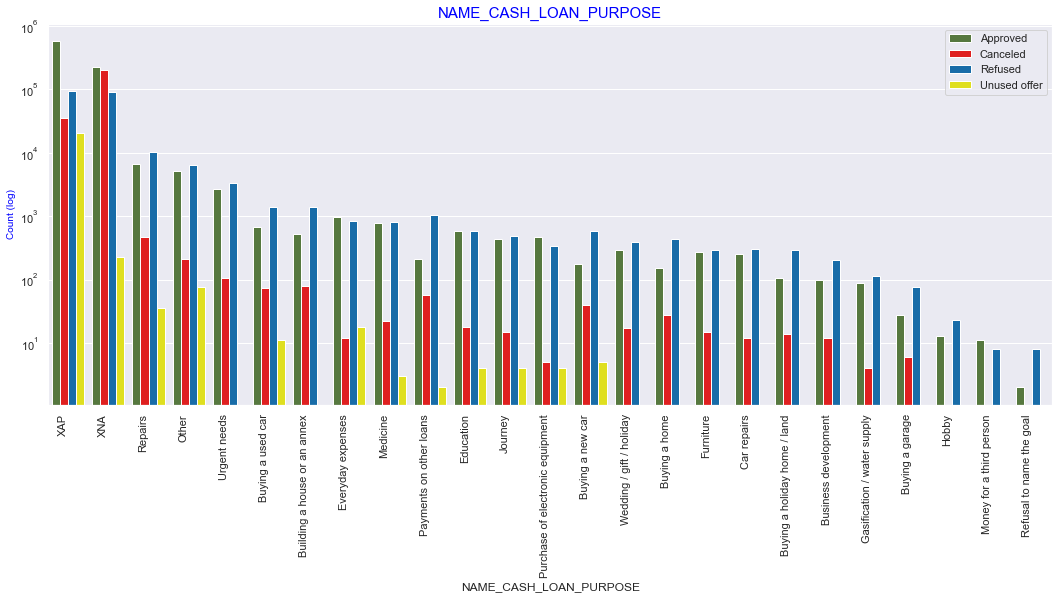

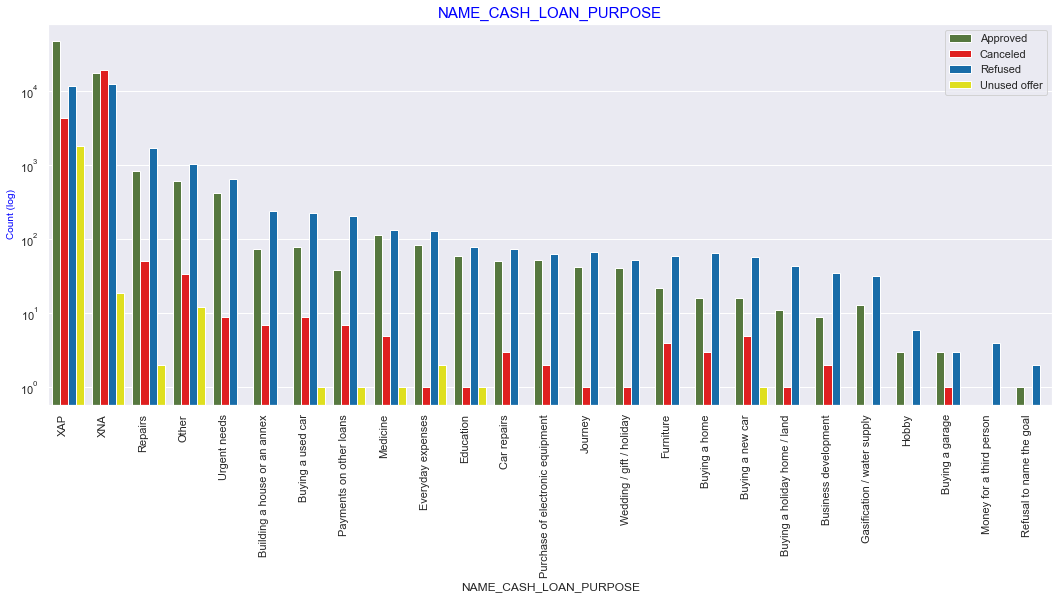

In [157]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",Repayers,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",Defaulters,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

#### Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss

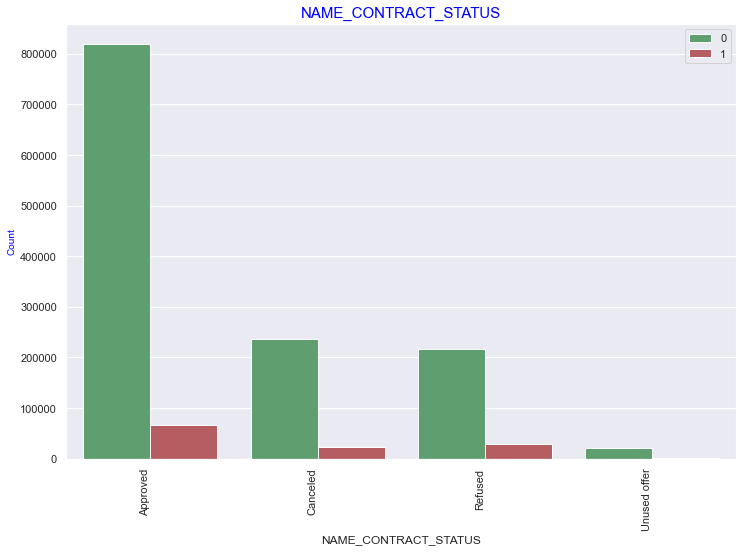

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [158]:
univariate_merged("NAME_CONTRACT_STATUS",merged_loan_df,"TARGET",['g','r'],False,(12,8))
g = merged_loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

#### plotting the relationship between income total and contact status

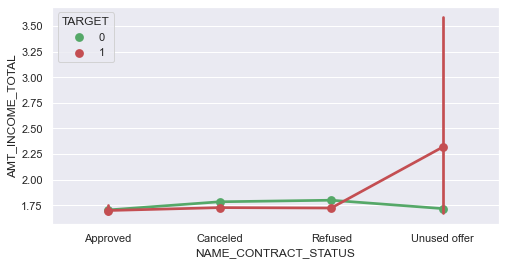

In [159]:
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

#### plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

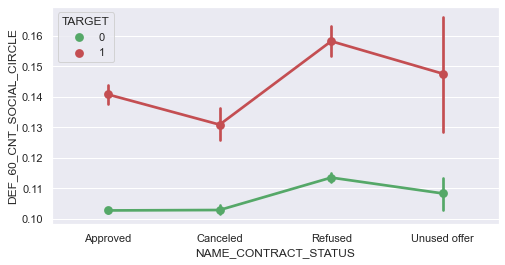

In [160]:
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')